# Import libraries, EEG features set, features exploration

In [1]:
# import modules

import importlib
import copy

import math

import numpy as np
import pandas as pd
import joblib
import mne
from math import *

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import seaborn as sns
import plotly.express as px
import plotly.io as pio

import generisAPI

importlib.reload(generisAPI)

import generisAPI.plots as plots

importlib.reload(generisAPI.plots)

import generisAPI.features_extractor as featuresMethods

importlib.reload(generisAPI.features_extractor)

import generisAPI.analysis as anls

importlib.reload(generisAPI.analysis)

import warnings

warnings.filterwarnings("ignore")

In [3]:
# load features and make definitions

electrodes = [
    "Fp1",
    "Fp2",
    "F3",
    "F4",
    "C3",
    "C4",
    "P3",
    "P4",
    "O1",
    "O2",
    "F7",
    "F8",
    "T3",
    "T4",
    "T5",
    "T6",
    "FZ",
    "PZ",
    "CZ",
]

entropy_features = joblib.load("../features/fuzzyEntropy.sav")
assr_features = joblib.load("../features/assr.sav")
mmn_eeg = joblib.load("../features/mmnEEGtimeSeries.sav")

# y = features['category']
# assr_1strest = features['rest1_assr']
# assr_2ndrest = features['rest2_assr']
# assr_aud = features['aud_assr']
# X_entropies = features.iloc[:,2:-1]


patientsIndex = np.argwhere(
    np.array(entropy_features["category"] == "Patient") == True
).flatten()
controlsIndex = np.argwhere(
    np.array(entropy_features["category"] == "Control") == True
).flatten()

In [4]:
entropy_features

,frontalEntropy(rest1),frontalEntropy(arith),frontalEntropy(rest2),parietalEntropy(rest1),parietalEntropy(arith),parietalEntropy(rest2),centralEntropy(rest1),centralEntropy(arith),centralEntropy(rest2),temporalEntropy(rest1),temporalEntropy(arith),temporalEntropy(rest2),occipitalEntropy(rest1),occipitalEntropy(arith),occipitalEntropy(rest2),category
10_0,5.285506,5.516579,6.843723,3.983493,6.032148,4.170336,4.809451,5.332050,4.091032,3.945999,7.283139,6.148835,3.456758,6.826992,5.377234,Patient
10_1,5.871802,5.243701,7.772336,4.064578,5.734826,4.981421,3.839269,5.369243,4.069415,4.937621,6.763848,6.930828,4.794076,6.667069,5.826653,Patient
11_0,5.082414,4.097428,4.041579,4.962581,5.424828,5.009800,4.763656,5.216139,4.599104,5.372436,5.346930,4.132445,4.890854,5.269775,4.451813,Control
11_1,4.739910,3.205360,4.534301,4.138735,5.143887,4.314634,4.242247,4.865794,4.172947,4.146636,5.137967,4.114244,3.833269,5.130625,4.248905,Control
12_0,3.481349,2.004735,2.285997,3.032094,3.527547,2.425353,2.855066,3.324150,2.402615,3.409738,3.626762,1.482925,2.891582,3.512754,2.293883,Control
12_1,3.375378,1.196525,3.503035,2.901653,3.255516,3.137426,2.712431,3.125747,2.952033,3.048007,2.904443,2.665431,2.730649,3.166485,2.859067,Control
13_0,6.637913,3.508169,6.453471,7.412846,9.379181,7.315175,7.041497,8.271922,8.146720,5.953930,8.490992,6.657730,6.874624,9.202006,7.395131,Control
13_1,7.468231,3.336105,5.852358,7.151063,8.238746,5.392047,7.156283,7.824326,4.995375,6.207881,8.799489,6.026088,6.685092,8.681647,5.629796,Control
14_0,5.848078,3.285342,6.576215,4.721873,8.265805,7.197062,4.426890,8.064345,7.142388,5.031092,8.049676,6.465411,5.025259,8.160295,6.265440,Patient
14_1,8.559623,2.665205,4.153737,7.164058,8.505352,3.818551,9.141592,8.417433,3.930470,7.846541,8.393832,4.506195,7.895410,8.686690,4.531397,Patient


# Data Analysis

## MMN

In [56]:
type(mmn_eeg)

dict

### MMN_EEG to (1X5) MMN_features(values)

In [3]:
mmn_feature_method_100ms = featuresMethods.MMN(19, 19, 19)
mmn_feature_method_200ms = featuresMethods.MMN(19, 38, 19)
mmn_feature_method_300ms = featuresMethods.MMN(19, 57, 19)
mmn_feature_method_400ms = featuresMethods.MMN(19, 66, 19)
mmn_feature_method_500ms = featuresMethods.MMN(19, 85, 19)

oneKdeviant = list()
threeKdeviant = list()
for subject in mmn_eeg["cateory"].index:
    oneKdeviant.append(
        [
            mmn_feature_method_100ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["1000Hz"]),
            mmn_feature_method_200ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["1000Hz"]),
            mmn_feature_method_300ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["1000Hz"]),
            mmn_feature_method_400ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["1000Hz"]),
            mmn_feature_method_500ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["1000Hz"]),
        ]
    )
    threeKdeviant.append(
        [
            mmn_feature_method_100ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["3000Hz"]),
            mmn_feature_method_200ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["3000Hz"]),
            mmn_feature_method_300ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["3000Hz"]),
            mmn_feature_method_400ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["3000Hz"]),
            mmn_feature_method_500ms.mmn_value(mmn_eeg["mmn_eeg"][subject]["3000Hz"]),
        ]
    )

X_mmn_1k = np.array(oneKdeviant)
X_mmn_3k = np.array(threeKdeviant)

del oneKdeviant, threeKdeviant

In [58]:
patients_1k_mmn = X_mmn_1k[patientsIndex, :, :]
patients_3k_mmn = X_mmn_3k[patientsIndex, :, :]
controls_1k_mmn = X_mmn_1k[controlsIndex, :, :]
controls_3k_mmn = X_mmn_3k[controlsIndex, :, :]
print(
    patients_1k_mmn.shape,
    patients_3k_mmn.shape,
    controls_1k_mmn.shape,
    controls_3k_mmn.shape,
)

(19, 5, 19) (19, 5, 19) (26, 5, 19) (26, 5, 19)


### Montage Analysis

In [34]:
plt.ioff()
fig, ax = plt.subplots(5, len(patientsIndex), figsize=(100, 30))

for patient in range(len(patientsIndex)):
    for epoch in range(4, -1, -1):
        plots.montage_plot(
            patients_1k_mmn[patient, epoch, :], electrodes, ax[4 - epoch, patient]
        )
ax[4, 0].set_ylabel("0-100ms", fontsize=40)
ax[3, 0].set_ylabel("100ms-200ms", fontsize=40)
ax[2, 0].set_ylabel("100ms-300ms", fontsize=40)
ax[1, 0].set_ylabel("300ms-400ms", fontsize=40)
ax[0, 0].set_ylabel("400ms-450ms", fontsize=40)
ax[4, 12].set_xlabel("SZ patients", fontsize=60)

fig.suptitle("1KHz duration deviant MMN montage for SZ patients", fontsize=70)
fig.tight_layout(pad=2.5)
plt.savefig(
    "../data_analysis_results/MMN/montage/Patient/1KHz_duration_deviant_montage.png"
)

In [35]:
plt.ioff()
fig, ax = plt.subplots(5, len(patientsIndex), figsize=(100, 30))

for patient in range(len(patientsIndex)):
    for epoch in range(4, -1, -1):
        plots.montage_plot(
            patients_3k_mmn[patient, epoch, :], electrodes, ax[4 - epoch, patient]
        )
ax[4, 0].set_ylabel("0-100ms", fontsize=40)
ax[3, 0].set_ylabel("100ms-200ms", fontsize=40)
ax[2, 0].set_ylabel("100ms-300ms", fontsize=40)
ax[1, 0].set_ylabel("300ms-400ms", fontsize=40)
ax[0, 0].set_ylabel("400ms-450ms", fontsize=40)
ax[4, 12].set_xlabel("SZ patients", fontsize=60)

fig.suptitle("3KHz frequency deviant MMN montage for SZ patients", fontsize=70)
fig.tight_layout(pad=2.5)
plt.savefig(
    "../data_analysis_results/MMN/montage/Patient/3KHz_frequency_deviant_montage.png"
)

In [36]:
plt.ioff()
fig, ax = plt.subplots(5, len(controlsIndex), figsize=(140, 30))

for control in range(len(controlsIndex)):
    for epoch in range(4, -1, -1):
        plots.montage_plot(
            controls_1k_mmn[control, epoch, :], electrodes, ax[4 - epoch, control]
        )
ax[4, 0].set_ylabel("0-100ms", fontsize=40)
ax[3, 0].set_ylabel("100ms-200ms", fontsize=40)
ax[2, 0].set_ylabel("100ms-300ms", fontsize=40)
ax[1, 0].set_ylabel("300ms-400ms", fontsize=40)
ax[0, 0].set_ylabel("400ms-450ms", fontsize=40)
ax[4, 12].set_xlabel("control subjects", fontsize=60)

fig.suptitle(
    "1KHz duration deviant MMN montage for healthy control subjects", fontsize=70
)
fig.tight_layout(pad=2.5)
plt.savefig(
    "../data_analysis_results/MMN/montage/Control/1KHz_duration_deviant_montage.png"
)

In [37]:
plt.ioff()
fig, ax = plt.subplots(5, len(controlsIndex), figsize=(140, 30))

for control in range(len(controlsIndex)):
    for epoch in range(4, -1, -1):
        plots.montage_plot(
            controls_3k_mmn[control, epoch, :], electrodes, ax[4 - epoch, control]
        )
ax[4, 0].set_ylabel("0-100ms", fontsize=40)
ax[3, 0].set_ylabel("100ms-200ms", fontsize=40)
ax[2, 0].set_ylabel("100ms-300ms", fontsize=40)
ax[1, 0].set_ylabel("300ms-400ms", fontsize=40)
ax[0, 0].set_ylabel("400ms-450ms", fontsize=40)
ax[4, 12].set_xlabel("control subjects", fontsize=60)

fig.suptitle(
    "3KHz frequency deviant MMN montage for healthy control subjects", fontsize=70
)
fig.tight_layout(pad=2.5)
plt.savefig(
    "../data_analysis_results/MMN/montage/Control/3KHz_frequency_deviant_montage.png"
)

### Correlations and Centroids Analysis

In [ ]:
#
mmn_values_1k = pd.DataFrame()
mmn_values_3k = pd.DataFrame()
for ci, ch in enumerate(electrodes):
    for wi, window in enumerate(["100ms", "200ms", "300ms", "400ms", "450ms"]):
        mmn_values_1k[ch + "_" + window + "_" + "1KHz"] = X_mmn_1k[:, wi, ci]
        mmn_values_3k[ch + "_" + window + "_" + "3KHz"] = X_mmn_3k[:, wi, ci]
mmn_values_1k["category"] = mmn_eeg["cateory"].tolist()
mmn_values_3k["category"] = mmn_eeg["cateory"].tolist()

#### 1KHz MMN

In [42]:
plt.figure()
category_grouped = mmn_values_1k.groupby("category").mean().T
classes_centroids_difference = abs(
    category_grouped.Patient - category_grouped.Control
).sort_values(ascending=False)
classes_centroids_difference.plot.bar(
    figsize=(24, 14),
    title="Distance between centroids patients and controls 1KHz MMN features",
    grid=True,
)
plt.axhline(y=0.1, color="r", linestyle="-")
plt.ylabel("Distance between Patients and Controls mmn_value centroids")
centroids_distances_1k = copy.deepcopy(classes_centroids_difference)
plt.savefig(
    "../data_analysis_results/MMN/correlations_analysis/1KHz_MMN_Values_subjects_categories_centroid_distance.png"
)

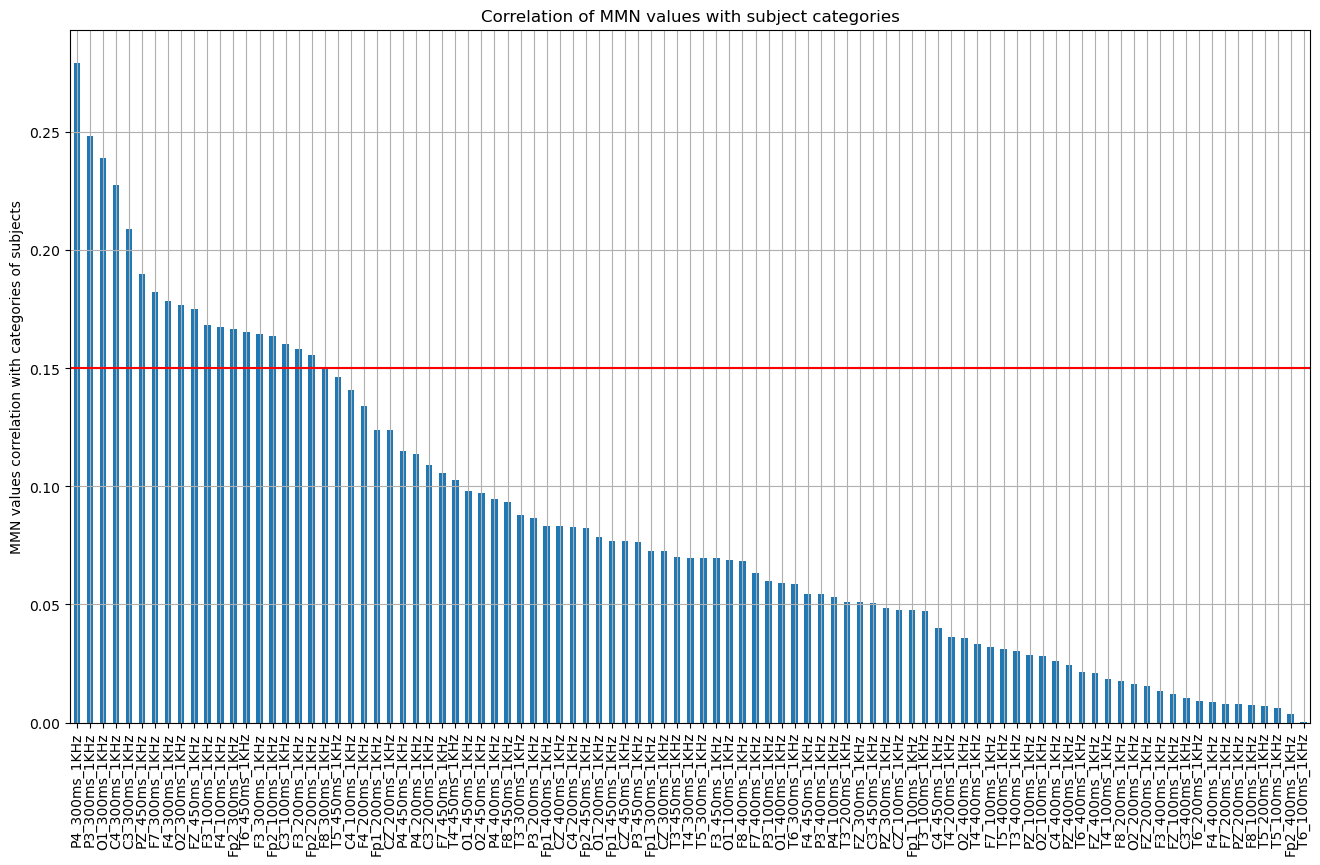

In [10]:
set2 = mmn_values_1k.drop(columns="category")
abs(set2.corrwith((mmn_values_1k["category"] == "Patient"))).sort_values(
    ascending=False
).plot.bar(
    figsize=(16, 9),
    title="Correlation of 1KHz MMN features with subjects category",
    grid=True,
)
plt.axhline(y=0.15, color="r", linestyle="-")
plt.ylabel("Correlation")
mmn_corr_1k = set2.corrwith((mmn_values_1k["category"] == "Patient"))

#### 3KHz MMN

In [11]:
mmn_values_3k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 96 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fp1_100ms_3KHz  45 non-null     float64
 1   Fp1_200ms_3KHz  45 non-null     float64
 2   Fp1_300ms_3KHz  45 non-null     float64
 3   Fp1_400ms_3KHz  45 non-null     float64
 4   Fp1_450ms_3KHz  45 non-null     float64
 5   Fp2_100ms_3KHz  45 non-null     float64
 6   Fp2_200ms_3KHz  45 non-null     float64
 7   Fp2_300ms_3KHz  45 non-null     float64
 8   Fp2_400ms_3KHz  45 non-null     float64
 9   Fp2_450ms_3KHz  45 non-null     float64
 10  F3_100ms_3KHz   45 non-null     float64
 11  F3_200ms_3KHz   45 non-null     float64
 12  F3_300ms_3KHz   45 non-null     float64
 13  F3_400ms_3KHz   45 non-null     float64
 14  F3_450ms_3KHz   45 non-null     float64
 15  F4_100ms_3KHz   45 non-null     float64
 16  F4_200ms_3KHz   45 non-null     float64
 17  F4_300ms_3KHz   45 non-null     float

In [12]:
mmn_values_3k.head()

,Fp1_100ms_3KHz,Fp1_200ms_3KHz,Fp1_300ms_3KHz,Fp1_400ms_3KHz,Fp1_450ms_3KHz,Fp2_100ms_3KHz,Fp2_200ms_3KHz,Fp2_300ms_3KHz,Fp2_400ms_3KHz,Fp2_450ms_3KHz,...,PZ_200ms_3KHz,PZ_300ms_3KHz,PZ_400ms_3KHz,PZ_450ms_3KHz,CZ_100ms_3KHz,CZ_200ms_3KHz,CZ_300ms_3KHz,CZ_400ms_3KHz,CZ_450ms_3KHz,category
0,0.093326,-0.558467,0.054847,0.210042,-0.229580,0.333641,0.179036,-0.555872,-0.568365,-0.137649,...,0.717427,0.231479,-0.181251,-0.163069,0.093326,-0.558467,0.054847,0.210042,-0.229580,Patient
1,0.729221,0.335054,-0.405998,0.092245,-0.018300,-0.187810,0.155170,0.377523,-0.208573,-0.078908,...,0.287873,-0.138363,-0.665218,0.066725,0.729221,0.335054,-0.405998,0.092245,-0.018300,Patient
2,0.319295,0.289572,-0.188481,-0.328803,-0.641423,-0.568472,0.154382,0.339832,0.357094,0.178545,...,-0.678356,-0.008224,0.047800,0.765628,0.319295,0.289572,-0.188481,-0.328803,-0.641423,Control
3,0.224428,-0.354305,0.357714,0.387876,-0.442867,-0.065394,0.311548,-0.615212,-0.376039,-0.264146,...,-0.322945,0.365996,0.591132,0.108854,0.224428,-0.354305,0.357714,0.387876,-0.442867,Control
4,-0.627777,-0.069188,0.115144,-0.046916,0.649648,0.548180,-0.646261,-0.314960,-0.439212,-0.634127,...,-0.344058,-0.280168,0.525728,-0.087007,-0.627777,-0.069188,0.115144,-0.046916,0.649648,Control


In [13]:
mmn_values_3k.describe()

,Fp1_100ms_3KHz,Fp1_200ms_3KHz,Fp1_300ms_3KHz,Fp1_400ms_3KHz,Fp1_450ms_3KHz,Fp2_100ms_3KHz,Fp2_200ms_3KHz,Fp2_300ms_3KHz,Fp2_400ms_3KHz,Fp2_450ms_3KHz,...,PZ_100ms_3KHz,PZ_200ms_3KHz,PZ_300ms_3KHz,PZ_400ms_3KHz,PZ_450ms_3KHz,CZ_100ms_3KHz,CZ_200ms_3KHz,CZ_300ms_3KHz,CZ_400ms_3KHz,CZ_450ms_3KHz
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.093897,-0.085795,0.052287,0.058354,-0.112495,0.036709,0.026801,-0.018871,-0.022684,-0.024303,...,-0.137952,0.066456,0.040814,0.003931,0.103837,0.093897,-0.085795,0.052287,0.058354,-0.112495
std,0.501779,0.373225,0.346107,0.400822,0.471974,0.469136,0.370861,0.400498,0.439399,0.478898,...,0.489333,0.411456,0.412462,0.424491,0.520660,0.501779,0.373225,0.346107,0.400822,0.471974
min,-0.803512,-0.773717,-0.717016,-0.866594,-0.924963,-0.795427,-0.783429,-0.626002,-0.822298,-0.776364,...,-0.827649,-0.704856,-0.820099,-0.764669,-0.781277,-0.803512,-0.773717,-0.717016,-0.866594,-0.924963
25%,-0.315669,-0.354305,-0.188481,-0.152049,-0.442867,-0.340111,-0.237814,-0.352392,-0.410424,-0.436993,...,-0.571182,-0.275630,-0.312666,-0.203030,-0.317009,-0.315669,-0.354305,-0.188481,-0.152049,-0.442867
50%,0.132719,-0.078390,0.057554,0.064076,-0.228149,-0.020048,0.123525,-0.020788,-0.043246,-0.078908,...,-0.244606,0.050681,0.007103,0.047800,0.093049,0.132719,-0.078390,0.057554,0.064076,-0.228149
75%,0.597195,0.232107,0.315676,0.344687,0.250183,0.472965,0.252169,0.339832,0.357094,0.336319,...,0.243109,0.402730,0.314219,0.357436,0.587845,0.597195,0.232107,0.315676,0.344687,0.250183
max,0.759611,0.588639,0.722337,0.794629,0.871318,0.889205,0.755360,0.761569,0.783598,0.798708,...,0.707993,0.717427,0.804327,0.864879,0.893138,0.759611,0.588639,0.722337,0.794629,0.871318


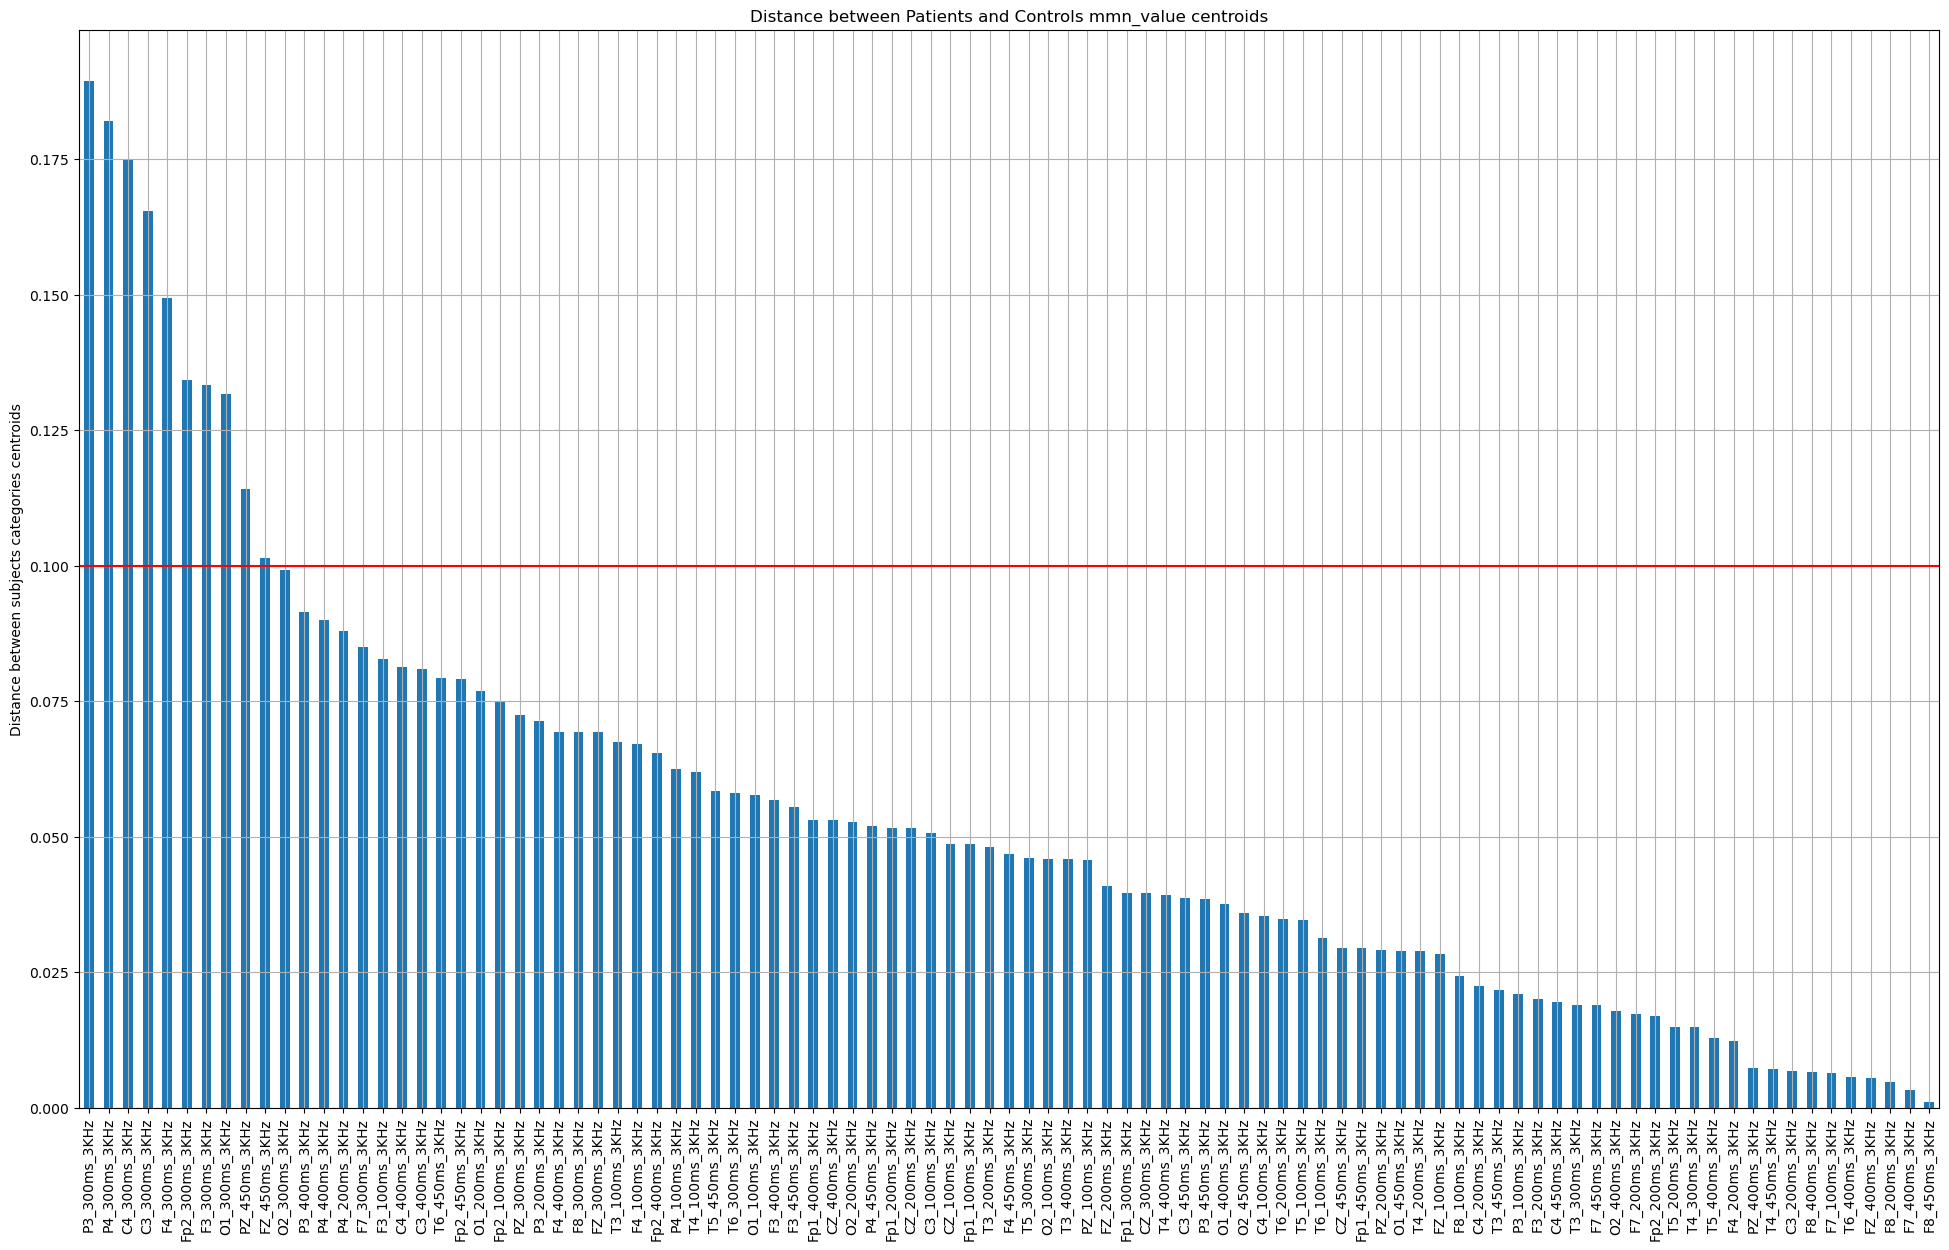

In [14]:
category_grouped = mmn_values_3k.groupby("category").mean().T
classes_centroids_difference = abs(
    category_grouped.Patient - category_grouped.Control
).sort_values(ascending=False)
classes_centroids_difference.plot.bar(
    figsize=(24, 14),
    title="Distance between Patients and Controls mmn_value centroids",
    grid=True,
)
plt.axhline(y=0.1, color="r", linestyle="-")
plt.ylabel("Distance between subjects categories centroids")
centroids_distances_3k = copy.deepcopy(classes_centroids_difference)

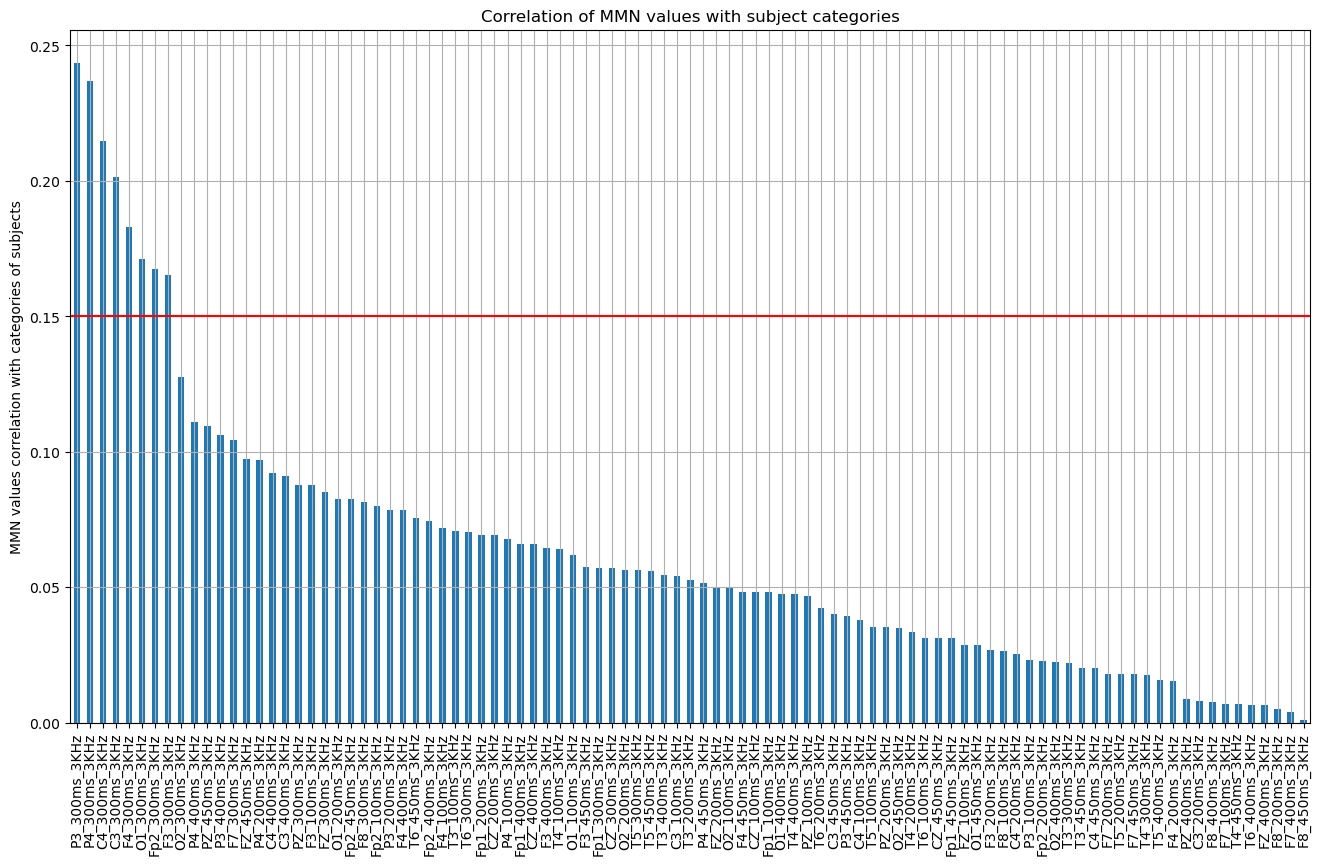

In [15]:
set2 = mmn_values_3k.drop(columns="category")
abs(set2.corrwith((mmn_values_1k["category"] == "Patient"))).sort_values(
    ascending=False
).plot.bar(
    figsize=(16, 9),
    title="Correlation of MMN values with subject categories",
    grid=True,
)
plt.axhline(y=0.15, color="r", linestyle="-")
plt.ylabel("MMN values correlation with categories of subjects")
mmn_corr_3k = set2.corrwith((mmn_values_3k["category"] == "Patient"))

#### 1KHz MMN agains 3KHz MMN values

In [16]:
new = []
for i in centroids_distances_1k.index:
    new.append(i[:-4])
centroids_distances_1k.index = new
new = []
for i in centroids_distances_3k.index:
    new.append(i[:-4])
centroids_distances_3k.index = new
df = pd.DataFrame({"1KHz": centroids_distances_1k, "3KHz": centroids_distances_3k})
df = df.reset_index()
fig = px.scatter(
    data_frame=df,
    x="1KHz",
    y="3KHz",
    color="index",
    title="subjects categories MMN vallues centroids distance between 1KHz and 3KHz deviants",
)
fig.add_hline(
    y=0.1, line_dash="dash", line_color="red", annotation_text="Horizontal Line"
)
fig.add_vline(
    x=0.1, line_dash="dash", line_color="red", annotation_text="Horizontal Line"
)

In [19]:
new = []
for i in mmn_corr_1k.index:
    new.append(i[:-4])
mmn_corr_1k.index = new
new = []
for i in mmn_corr_3k.index:
    new.append(i[:-4])
mmn_corr_3k.index = new
df = pd.DataFrame({"1KHz": mmn_corr_1k, "3KHz": mmn_corr_3k})
df = df.reset_index()
fig = px.scatter(
    data_frame=df,
    x="1KHz",
    y="3KHz",
    color="index",
    title="subjects categories MMN vallues correlations between 1KHz and 3KHz deviants",
)
fig.add_hline(
    y=0.1, line_dash="dash", line_color="red", annotation_text="Horizontal Threshold"
)
fig.add_vline(
    x=0.1, line_dash="dash", line_color="red", annotation_text="Vertical Threshold"
)
fig.add_hline(
    y=-0.1, line_dash="dash", line_color="red", annotation_text="Horizontal Threshold"
)
fig.add_vline(
    x=-0.1, line_dash="dash", line_color="red", annotation_text="Vertical Threshold"
)
# pio.write_image(fig, 'scatter_plot.png')

In [35]:
def mmn_value_plot(
    mmn_value1_array, mmn_value2_array, patients, controls, electrodes, div, title
):
    fig, ax = plt.subplots(3, 7, figsize=(16, 6))
    for r in range(3):
        for c in range(7):
            ax[r, c].scatter(
                mmn_value1_array[patients, div, (7 * r) + c],
                mmn_value2_array[patients, div, (7 * r) + c],
            )
            ax[r, c].scatter(
                mmn_value1_array[controls, div, (7 * r) + c],
                mmn_value2_array[controls, div, (7 * r) + c],
            )
            ax[r, c].set_title(electrodes[(7 * r) + c])
            if r == 2:
                ax[r, c].set_xlabel("1k_duration_deviant")
            if c == 0:
                ax[r, c].set_ylabel("3k_duration_deviant")
            if (7 * r) + c == 18:
                break
    fig.tight_layout(pad=2.5)
    fig.legend(["Patients", "Controls"], loc="upper right")
    fig.suptitle(title)

<Figure size 640x480 with 0 Axes>

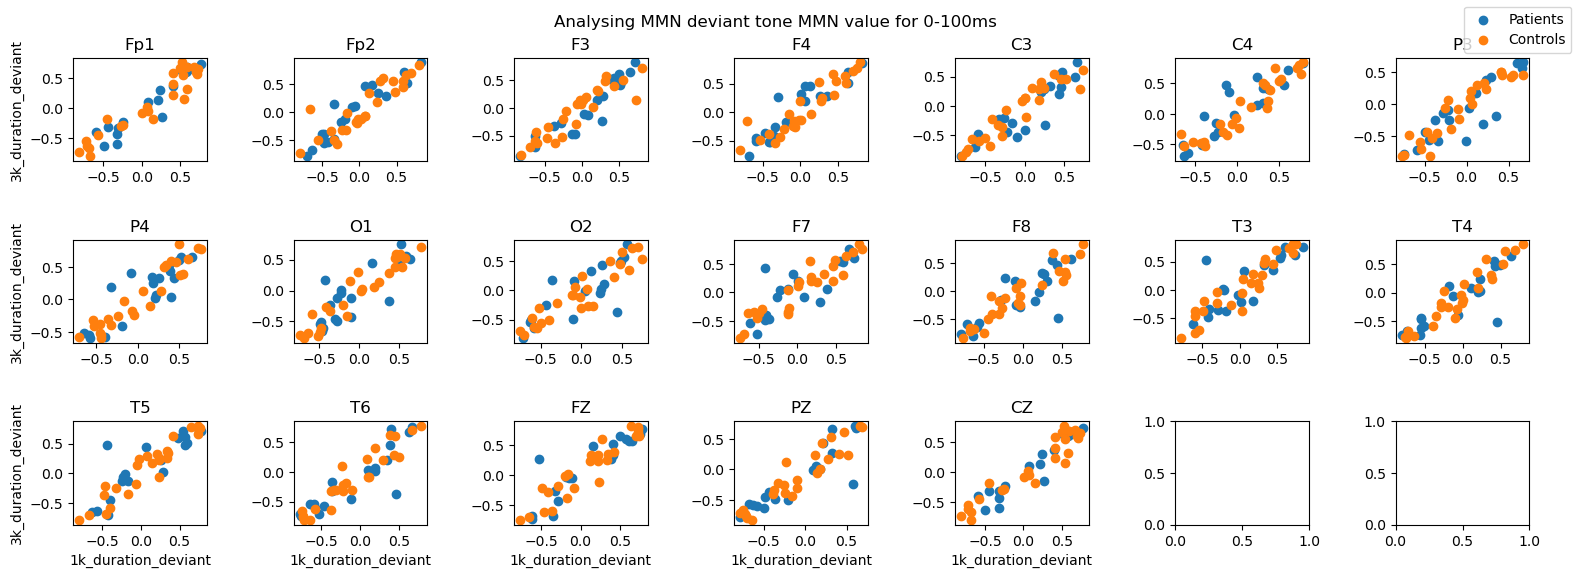

In [45]:
plt.clf()
plt.ion()
mmn_value_plot(
    X_mmn_1k,
    X_mmn_3k,
    patientsIndex,
    controlsIndex,
    electrodes,
    0,
    "Analysing MMN deviant tone MMN value for 0-100ms",
)

<Figure size 640x480 with 0 Axes>

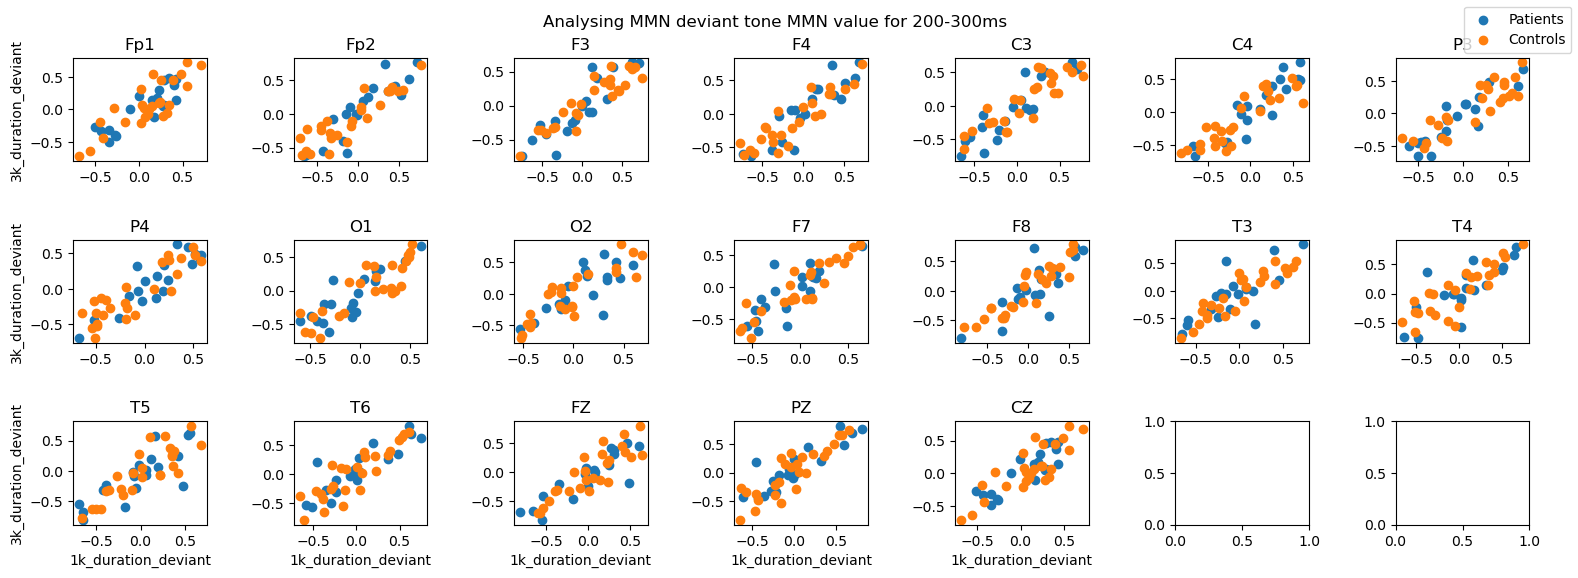

In [43]:
plt.clf()
plt.ion()
mmn_value_plot(
    X_mmn_1k,
    X_mmn_3k,
    patientsIndex,
    controlsIndex,
    electrodes,
    2,
    "Analysing MMN deviant tone MMN value for 200-300ms",
)

<Figure size 640x480 with 0 Axes>

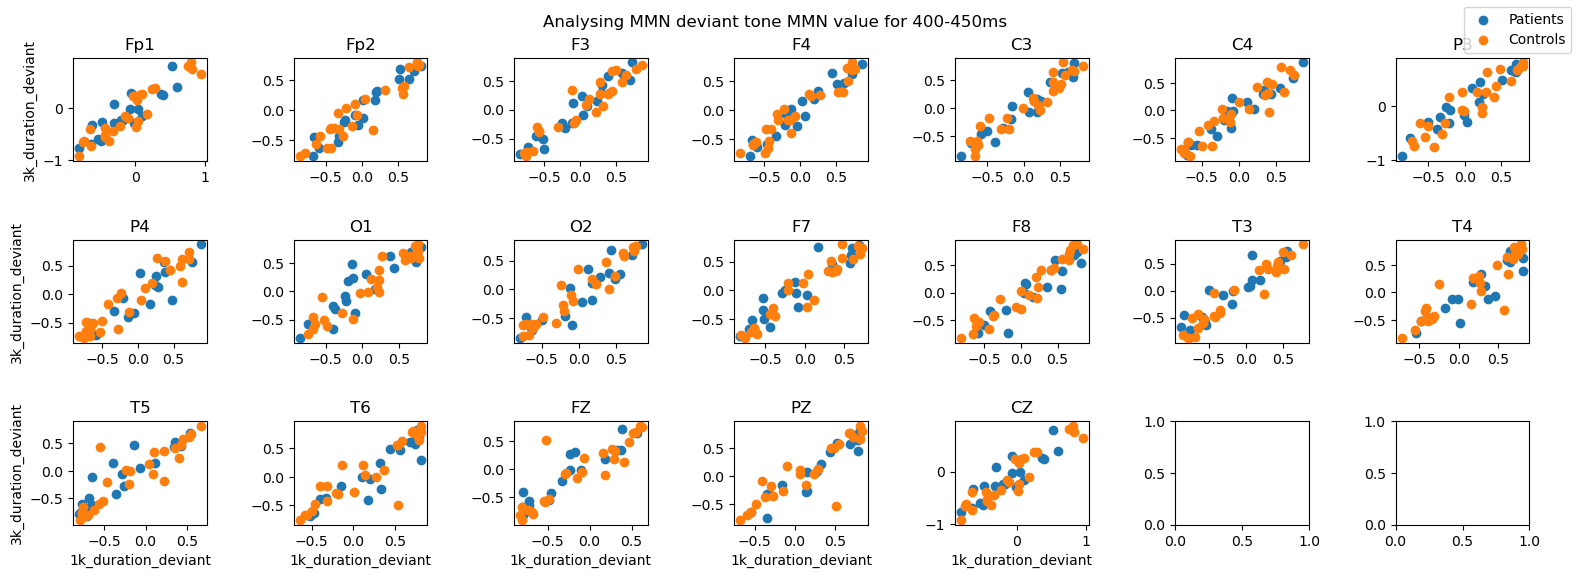

In [44]:
plt.clf()
plt.ion()
mmn_value_plot(
    X_mmn_1k,
    X_mmn_3k,
    patientsIndex,
    controlsIndex,
    electrodes,
    4,
    "Analysing MMN deviant tone MMN value for 400-450ms",
)

#### waveforms plots

In [ ]:
# per subject MMN plot
# %%capture
plt.ioff()
for s in mmn_eeg["mmn_eeg"]:
    pts = 20
    fig, ax = plt.subplots(5, 4, figsize=(12, 10))
    plots.electrodes_mmn_plot(ax[0, :], mmn_eeg["mmn_eeg"][s], 0, 4, electrodes, pts)
    plots.electrodes_mmn_plot(ax[1, :], mmn_eeg["mmn_eeg"][s], 4, 8, electrodes, pts)
    plots.electrodes_mmn_plot(ax[2, :], mmn_eeg["mmn_eeg"][s], 8, 12, electrodes, pts)
    plots.electrodes_mmn_plot(ax[3, :], mmn_eeg["mmn_eeg"][s], 12, 16, electrodes, pts)
    plots.electrodes_mmn_plot(
        ax[4, 0:3], mmn_eeg["mmn_eeg"][s], 16, 19, electrodes, pts
    )
    [x.set_xlabel("Time(s)") for x in ax[4, 0:4]]
    fig.suptitle(s + ":" + mmn_eeg["cateory"][s])
    fig.tight_layout(pad=1.5)

    fig.legend(["1000Hz", "3000Hz"], loc="upper right")
    plt.savefig(
        "../data_analysis_results/MMN/time_series/"
        + mmn_eeg["cateory"][s]
        + "/"
        + s
        + ".png",
        format="png",
    )

/tmp/ipykernel_19913/498183329.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(5,4,figsize=(12,10))


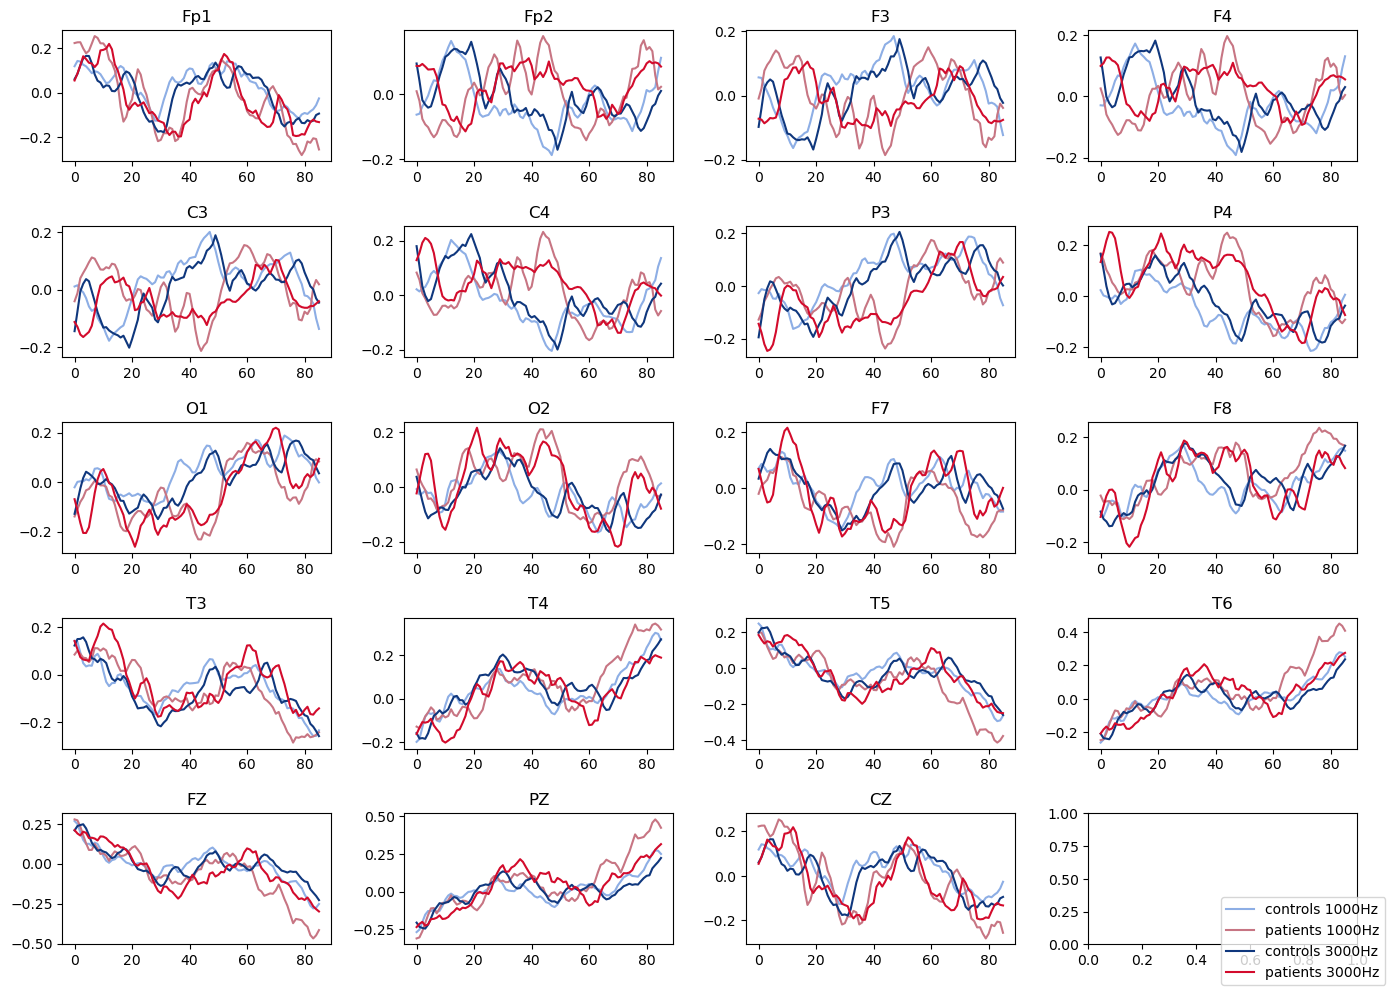

In [39]:
# per electrodes 1000Hz stimuli MMN plot of controls vs patients
fig = 0
del fig


def mmn_comparison():
    plt.ion()
    fig, ax = plt.subplots(5, 4, figsize=(14, 10))

    for r in range(5):
        for c in range(4):
            ec = (r * 4) + c
            # print(r,c,ec)
            # ss=[]
            if ec == 19:
                break
            xc1, xc3, xp1, xp3 = (0, 0, 0, 0)
            for s in mmn_eeg["mmn_eeg"]:
                pts = 20
                if mmn_eeg["cateory"][s] == "Control":
                    xc1 += mmn_eeg["mmn_eeg"][s]["1000Hz"][ec, :]
                    xc3 += mmn_eeg["mmn_eeg"][s]["3000Hz"][ec, :]
                else:
                    xp1 += mmn_eeg["mmn_eeg"][s]["1000Hz"][ec, :]
                    xp3 += mmn_eeg["mmn_eeg"][s]["3000Hz"][ec, :]
            ax[r, c].plot(xc1 / len(controlsIndex), "#8daee5", label="controls 1000Hz")
            ax[r, c].plot(xp1 / len(patientsIndex), "#c77583", label="patients 1000Hz")
            ax[r, c].plot(xc3 / len(controlsIndex), "#0f377d", label="controls 3000Hz")
            ax[r, c].plot(xp3 / len(patientsIndex), "#d30b2c", label="patients 3000Hz")
            ax[r, c].set_title(electrodes[ec])
            # else:
            # x=mmn_eeg['mmn_eeg'][s]['1000Hz'][ec,:]
            # x=(x-x.mean())/x.std()
            # ax[r,c].plot(x,'#d30b2c',label='Patient')
            # print(ss)
    fig.tight_layout(pad=1.5)
    fig.legend(
        ["controls 1000Hz", "patients 1000Hz", "controls 3000Hz", "patients 3000Hz"],
        loc="lower right",
    )


mmn_comparison()

### t-test

In [89]:
from scipy import stats

mmn_1KHz_100ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)
mmn_3KHz_100ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)
mmn_1KHz_200ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)
mmn_3KHz_200ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)
mmn_1KHz_300ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)
mmn_3KHz_300ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)
mmn_1KHz_400ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)
mmn_3KHz_400ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)
mmn_1KHz_500ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)
mmn_3KHz_500ms_pvalues = pd.DataFrame(index=electrodes, columns=electrodes)

for row, _r in enumerate(electrodes):
    for col, _c in enumerate(electrodes):
        mmn_1KHz_100ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_1k_mmn[:, 0, row], controls_1k_mmn[:, 0, col]
            ).pvalue,
            2,
        )
        mmn_3KHz_100ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_3k_mmn[:, 0, row], controls_3k_mmn[:, 0, col]
            ).pvalue,
            2,
        )

        mmn_1KHz_200ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_1k_mmn[:, 1, row], controls_1k_mmn[:, 1, col]
            ).pvalue,
            2,
        )
        mmn_3KHz_200ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_3k_mmn[:, 1, row], controls_3k_mmn[:, 1, col]
            ).pvalue,
            2,
        )

        mmn_1KHz_300ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_1k_mmn[:, 2, row], controls_1k_mmn[:, 2, col]
            ).pvalue,
            2,
        )
        mmn_3KHz_300ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_3k_mmn[:, 2, row], controls_3k_mmn[:, 2, col]
            ).pvalue,
            2,
        )

        mmn_1KHz_400ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_1k_mmn[:, 3, row], controls_1k_mmn[:, 3, col]
            ).pvalue,
            2,
        )
        mmn_3KHz_400ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_3k_mmn[:, 3, row], controls_3k_mmn[:, 3, col]
            ).pvalue,
            2,
        )

        mmn_1KHz_500ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_1k_mmn[:, 4, row], controls_1k_mmn[:, 4, col]
            ).pvalue,
            2,
        )
        mmn_3KHz_500ms_pvalues.loc[_r, _c] = round(
            stats.ttest_ind(
                patients_3k_mmn[:, 4, row], controls_3k_mmn[:, 4, col]
            ).pvalue,
            2,
        )

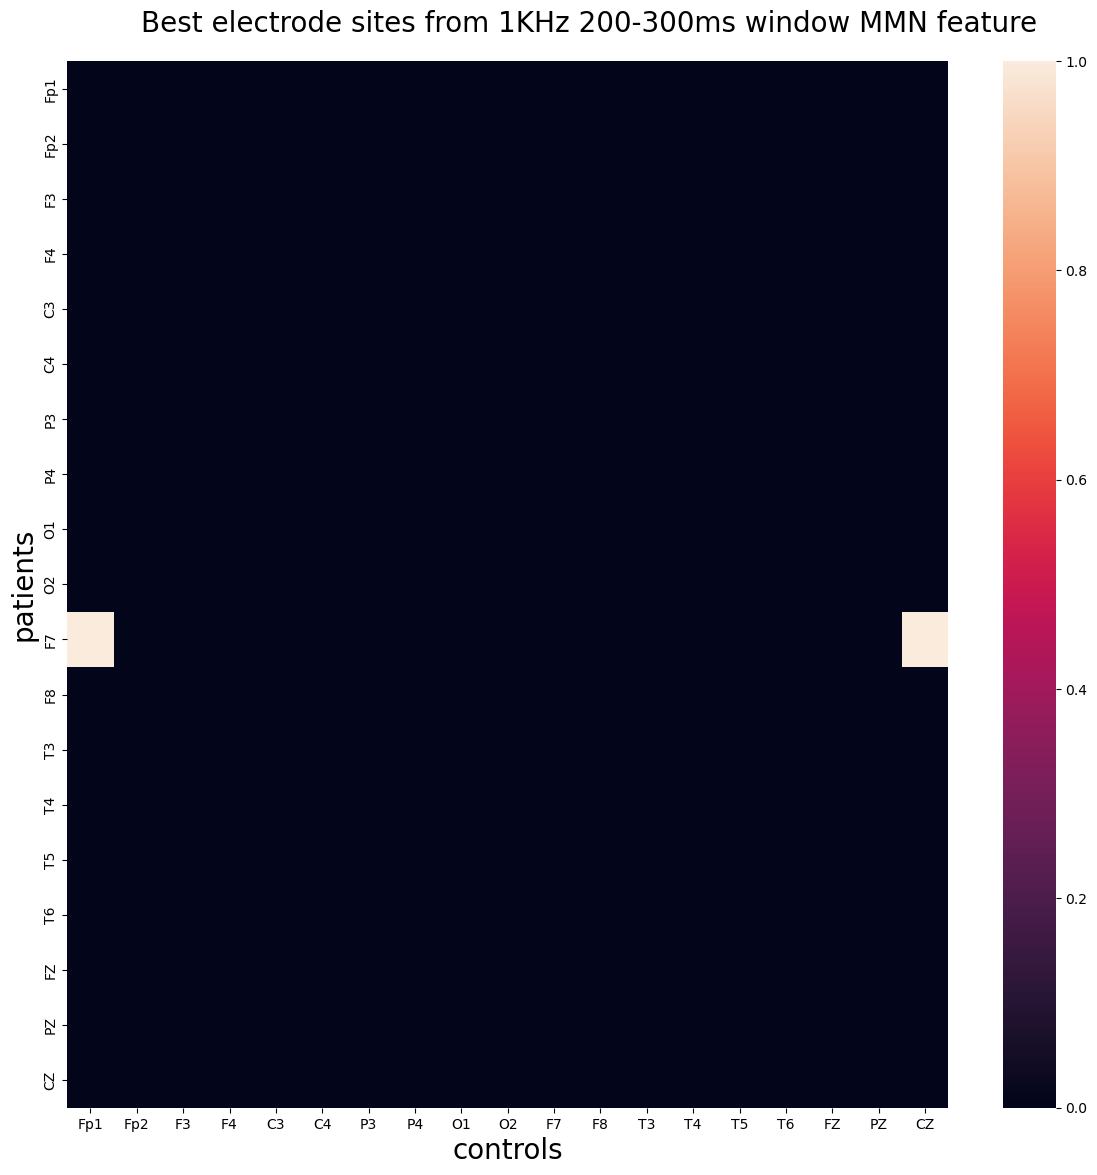

In [102]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(mmn_1KHz_300ms_pvalues <= 0.05)
fig.suptitle("Best electrode sites from 1KHz 200-300ms window MMN feature", fontsize=20)
plt.xlabel("controls", fontsize=20)
plt.ylabel("patients", fontsize=20)
fig.tight_layout(pad=1.5)

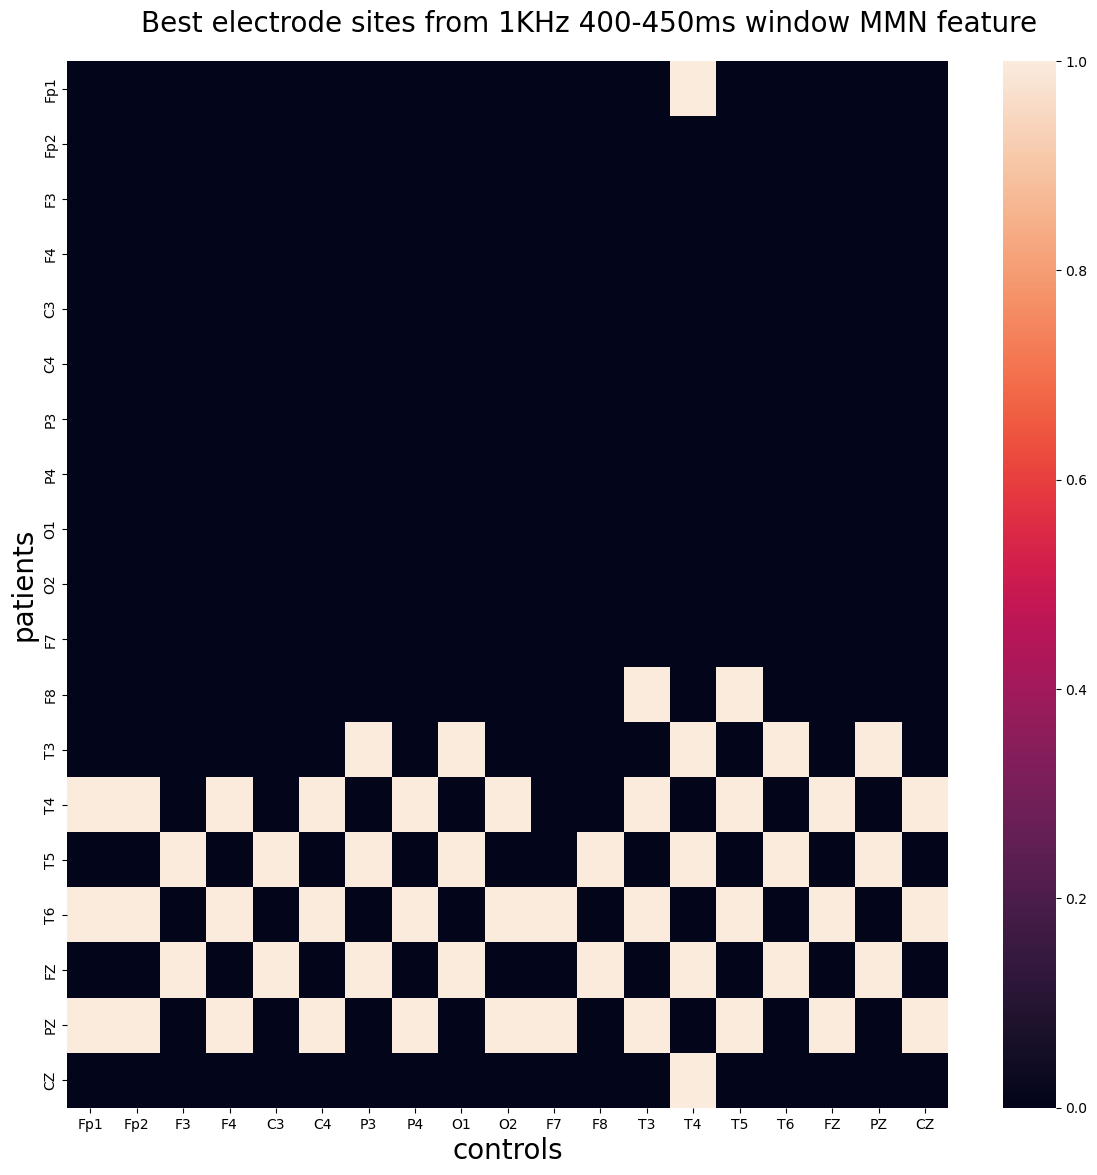

In [103]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(mmn_1KHz_500ms_pvalues <= 0.05)
fig.suptitle("Best electrode sites from 1KHz 400-450ms window MMN feature", fontsize=20)
plt.xlabel("controls", fontsize=20)
plt.ylabel("patients", fontsize=20)
fig.tight_layout(pad=1.5)

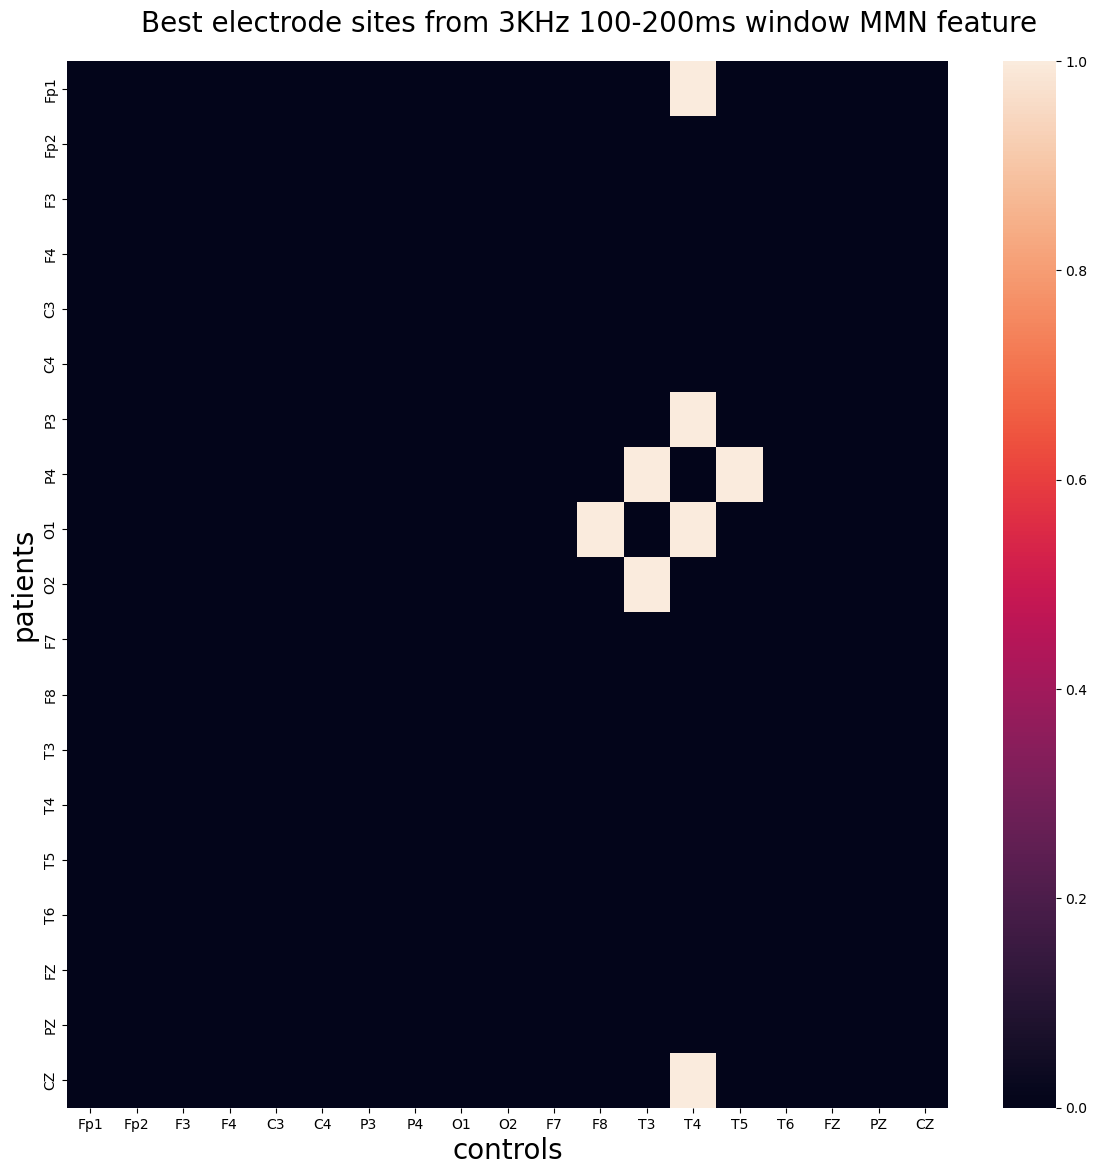

In [104]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(mmn_3KHz_200ms_pvalues <= 0.05)
fig.suptitle("Best electrode sites from 3KHz 100-200ms window MMN feature", fontsize=20)
plt.xlabel("controls", fontsize=20)
plt.ylabel("patients", fontsize=20)
fig.tight_layout(pad=1.5)

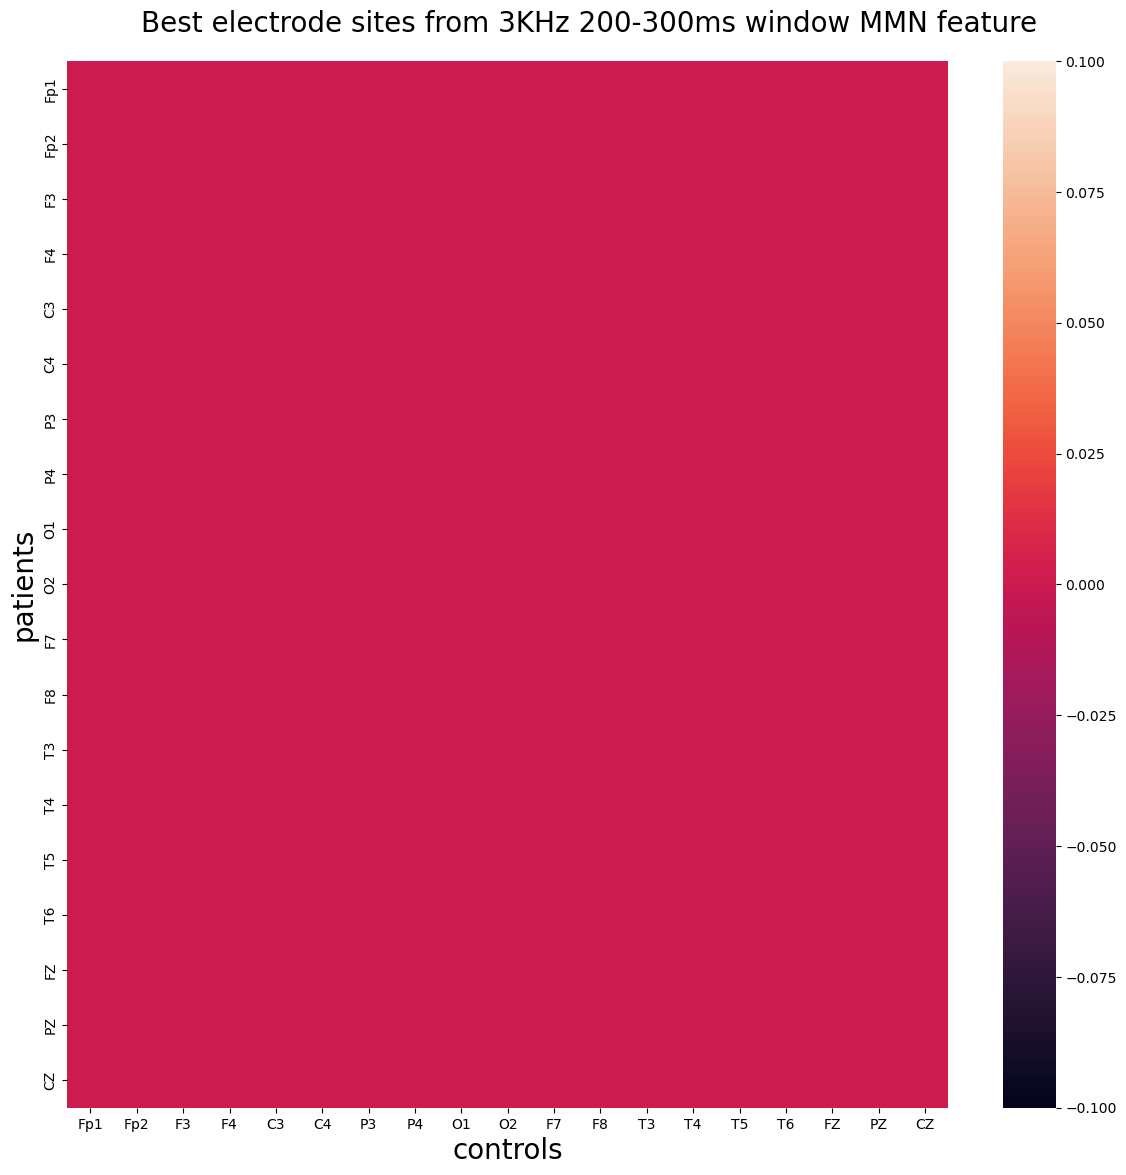

In [105]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(mmn_3KHz_300ms_pvalues <= 0.05)
fig.suptitle("Best electrode sites from 3KHz 200-300ms window MMN feature", fontsize=20)
plt.xlabel("controls", fontsize=20)
plt.ylabel("patients", fontsize=20)
fig.tight_layout(pad=1.5)

## ASSR

### Understanding Data Structure

In [3]:
type(assr_features)

dict

In [4]:
assr_features.keys()

dict_keys(['1stRest_assr', '2ndRest_assr', 'aud_assr', 'category'])

In [5]:
for key in assr_features.keys():
    print(key, ":", type(assr_features[key]))

1stRest_assr : <class 'dict'>
2ndRest_assr : <class 'dict'>
aud_assr : <class 'dict'>
category : <class 'pandas.core.series.Series'>


### Oganizing ASSR features into a dataframe

In [6]:
# y_class = assr_features['category']
assr_1strest = plots.get_assr_data_4_plot(assr_features["1stRest_assr"])
assr_2ndrest = plots.get_assr_data_4_plot(assr_features["2ndRest_assr"])
assr_aud = plots.get_assr_data_4_plot(assr_features["aud_assr"])

In [7]:
assr_values = pd.DataFrame()
for p, param in enumerate(["mag", "phase"]):
    for ch, electrode in enumerate(electrodes):
        assr_values["1strest_" + param + "_" + electrode] = assr_1strest[:, p, ch]
        assr_values["2ndrest_" + param + "_" + electrode] = assr_2ndrest[:, p, ch]
        assr_values["aud_" + param + "_" + electrode] = assr_aud[:, p, ch]
assr_values["category"] = assr_features["category"].tolist()
assr_values.head()

,1strest_mag_Fp1,2ndrest_mag_Fp1,aud_mag_Fp1,1strest_mag_Fp2,2ndrest_mag_Fp2,aud_mag_Fp2,1strest_mag_F3,2ndrest_mag_F3,aud_mag_F3,1strest_mag_F4,...,1strest_phase_FZ,2ndrest_phase_FZ,aud_phase_FZ,1strest_phase_PZ,2ndrest_phase_PZ,aud_phase_PZ,1strest_phase_CZ,2ndrest_phase_CZ,aud_phase_CZ,category
0,1.718609e-30,1.796797e-30,2.430580e-29,2.188748e-15,7.698836e-15,2.960174e-15,3.936875e-15,1.453195e-14,5.988868e-15,5.531738e-15,...,-2.561799,0.757103,2.596248,0.636176,-2.356941,-0.541964,0.471613,2.029822,2.397990,Patient
1,6.145584e-30,9.706706e-30,6.077952e-30,4.834967e-15,4.235206e-15,5.280582e-15,8.716825e-15,9.057809e-15,1.156017e-14,1.092718e-14,...,-2.481783,-0.028378,-0.026837,0.639253,3.114420,3.119920,-0.066205,-0.275928,0.912575,Patient
2,2.016393e-30,7.608123e-30,7.008332e-30,8.288267e-15,8.581085e-15,2.246034e-15,1.631625e-14,1.674719e-14,4.329764e-15,2.248127e-14,...,0.057240,2.491298,2.074251,-3.112627,-0.661113,-1.050807,1.869874,2.874248,-2.453191,Control
3,6.569327e-30,2.983832e-30,7.666937e-30,1.002970e-14,3.445079e-15,4.979713e-15,1.979552e-14,6.804030e-15,9.598513e-15,2.774534e-14,...,2.530001,-0.081006,-1.304518,-0.615937,3.073146,1.822343,2.433461,2.955727,-0.115264,Control
4,9.275827e-31,2.610361e-30,2.808968e-30,1.941656e-15,8.177057e-16,2.663667e-15,3.615347e-15,1.634868e-15,4.633769e-15,4.873429e-15,...,-0.882816,1.891507,-1.083666,2.171547,-1.224357,2.037564,-1.161887,2.766240,-2.645517,Control


In [8]:
patients_assr = assr_values.iloc[patientsIndex][:]
controls_assr = assr_values.iloc[controlsIndex][:]

### Exploratory Data Analysis

#### Correlations and heatmaps

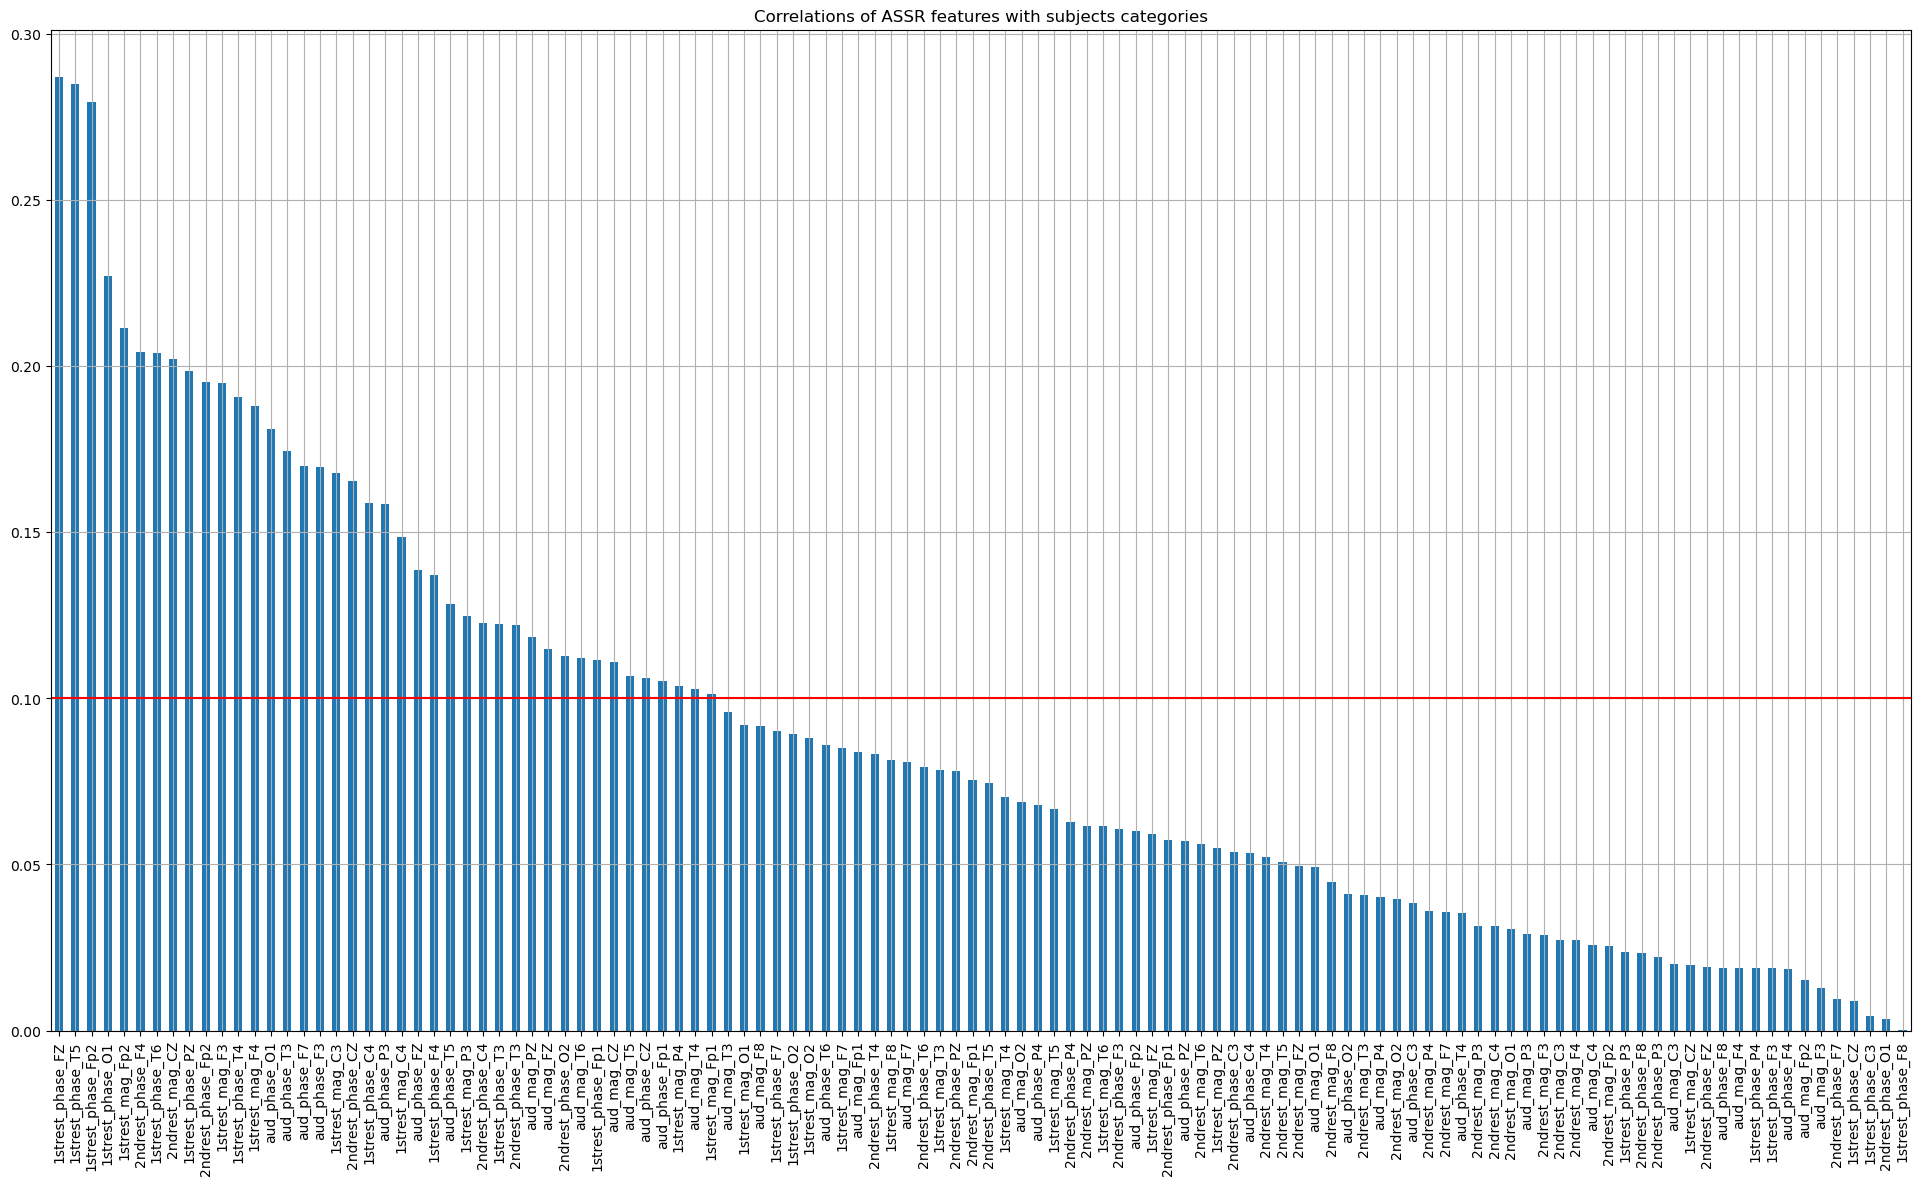

In [31]:
assr_values2 = assr_values.drop(columns="category", inplace=False)
abs(assr_values2.corrwith((assr_values["category"] == "Patient"))).sort_values(
    ascending=False
).plot.bar(
    figsize=(24, 13),
    title="Correlations of ASSR features with subjects categories",
    grid=True,
)
plt.axhline(y=0.1, color="r", linestyle="-")
plt.savefig("../data_analysis_results/ASSR/assr_correlations.png")

#### ttest

<AxesSubplot: >

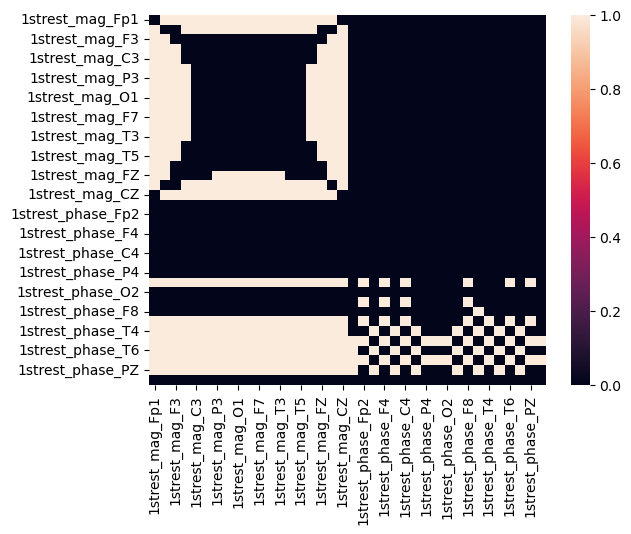

In [49]:
_cols = [col for col in assr_values.columns if "1strest" in col]
first_rest_ttest = pd.DataFrame(index=_cols, columns=_cols)

from scipy import stats

for row in _cols:
    for col in _cols:
        first_rest_ttest.loc[row, col] = stats.ttest_ind(
            patients_assr[row], controls_assr[col]
        ).pvalue
sns.heatmap(first_rest_ttest.astype(float) <= 0.05)

<AxesSubplot: >

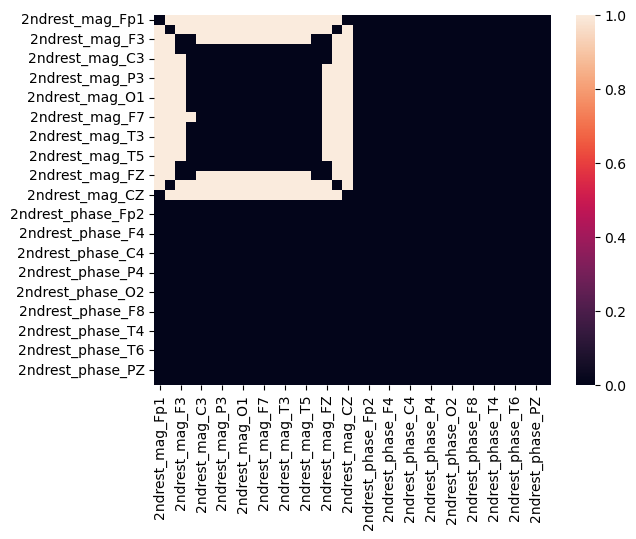

In [51]:
_cols = [col for col in assr_values.columns if "2ndrest" in col]
second_rest_ttest = pd.DataFrame(index=_cols, columns=_cols)

from scipy import stats

for row in _cols:
    for col in _cols:
        second_rest_ttest.loc[row, col] = stats.ttest_ind(
            patients_assr[row], controls_assr[col]
        ).pvalue


sns.heatmap(second_rest_ttest.astype(float) <= 0.05)

<AxesSubplot: >

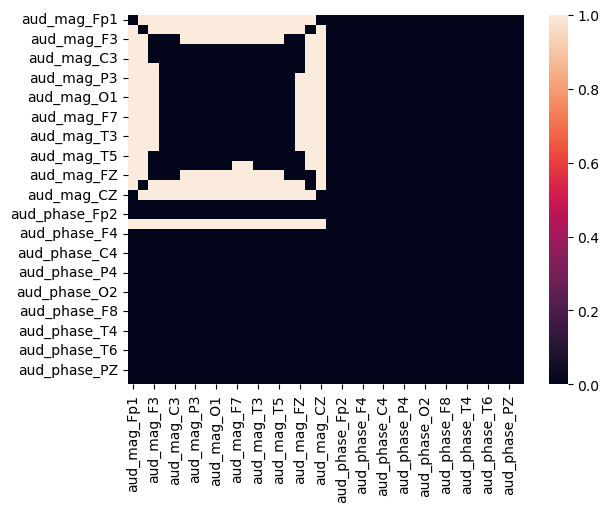

In [52]:
_cols = [col for col in assr_values.columns if "aud" in col]
aud_rest_ttest = pd.DataFrame(index=_cols, columns=_cols)

from scipy import stats

for row in _cols:
    for col in _cols:
        aud_rest_ttest.loc[row, col] = stats.ttest_ind(
            patients_assr[row], controls_assr[col]
        ).pvalue

sns.heatmap(aud_rest_ttest.astype(float) <= 0.05)

### feature plots

In [11]:
patients_1strest_assr, controls_1strest_assr = (
    assr_1strest[patientsIndex],
    assr_1strest[controlsIndex],
)

patients_2ndrest_assr, controls_2ndrest_assr = (
    assr_2ndrest[patientsIndex],
    assr_2ndrest[controlsIndex],
)

patients_aud_assr, controls_aud_assr = (
    assr_aud[patientsIndex],
    assr_aud[controlsIndex],
)

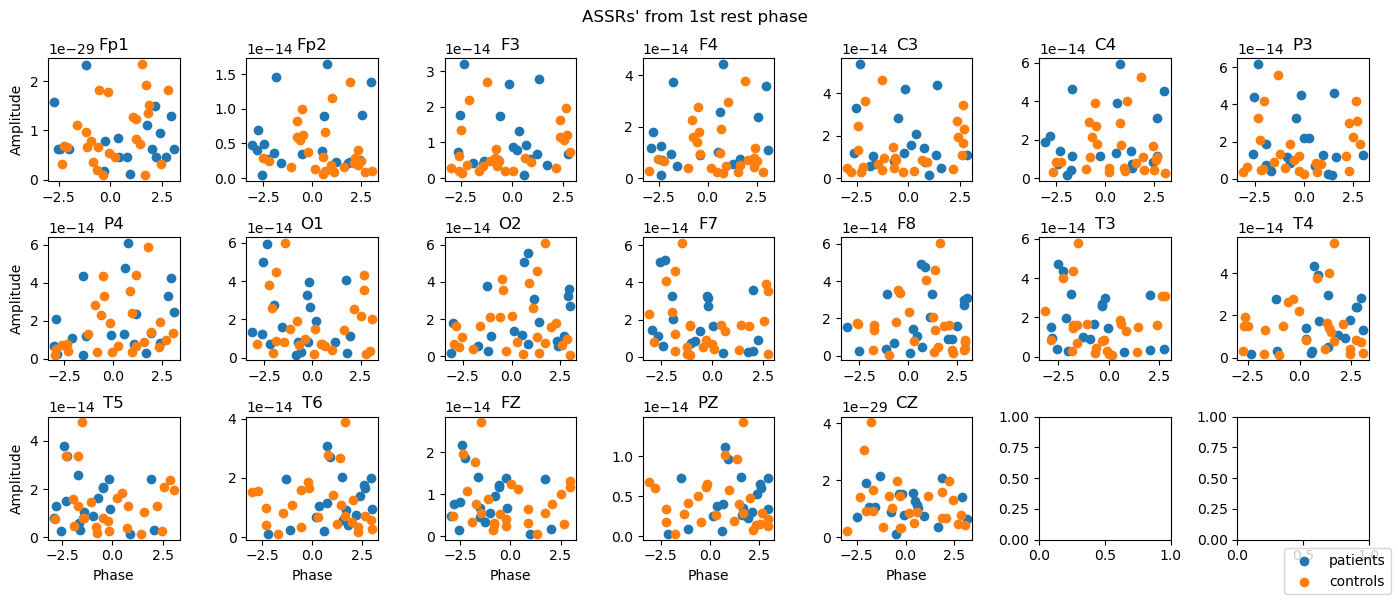

In [12]:
plots.assr_plot(
    patients_1strest_assr,
    controls_1strest_assr,
    electrodes,
    "ASSRs' from 1st rest phase",
)

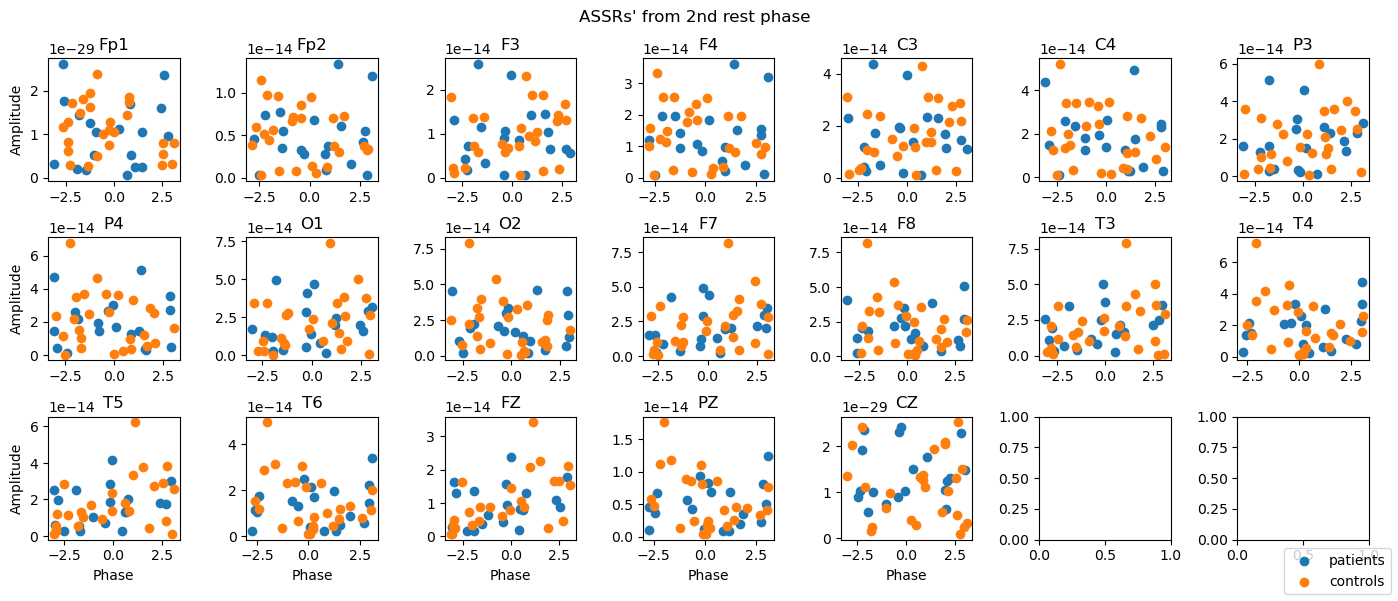

In [13]:
plots.assr_plot(
    patients_2ndrest_assr,
    controls_2ndrest_assr,
    electrodes,
    "ASSRs' from 2nd rest phase",
)

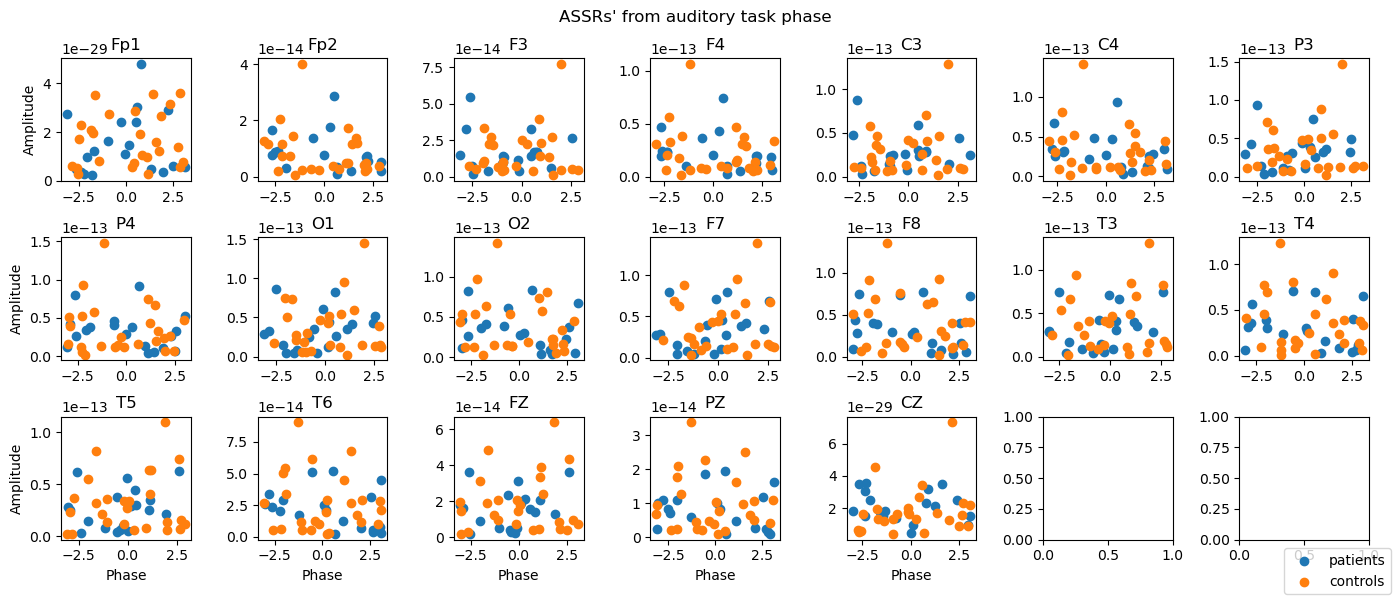

In [14]:
plots.assr_plot(
    patients_aud_assr, controls_aud_assr, electrodes, "ASSRs' from auditory task phase"
)

## Fuzzy Entropy

### Exploratory Data Analysis

In [9]:
entropy = entropy_features
patients_entropy = entropy[entropy.category == "Patient"]
controls_entropy = entropy[entropy.category == "Control"]

#### montage

In [ ]:
fig, ax = plt.subplots(3, len(patientsIndex), figsize=(160, 30))
for patient in range(len(patients_entropy)):
    plots.montage_plot(
        patients_entropy.iloc[patient][[2, 5, 8, 11, 11, 14]],
        ["FZ", "PZ", "CZ", "T5", "T6", "OZ"],
        ax[0, patient],
    )
    plots.montage_plot(
        patients_entropy.iloc[patient][[1, 4, 7, 10, 10, 13]],
        ["FZ", "PZ", "CZ", "T5", "T6", "OZ"],
        ax[1, patient],
    )
    plots.montage_plot(
        patients_entropy.iloc[patient][[0, 3, 6, 9, 9, 12]],
        ["FZ", "PZ", "CZ", "T5", "T6", "OZ"],
        ax[2, patient],
    )
ax[0, 0].set_ylabel("rest2", fontsize=40)
ax[1, 0].set_ylabel("Arithmetic", fontsize=40)
ax[2, 0].set_ylabel("rest1", fontsize=40)
ax[2, 9].set_xlabel("SZ patients", fontsize=60)

fig.suptitle("SZ Patients Entropy Montage", fontsize=70)
fig.tight_layout(pad=2.5)
plt.savefig("../data_analysis_results/FuzzEnt/Patient/montage.png")

In [ ]:
fig, ax = plt.subplots(3, len(controlsIndex), figsize=(200, 30))
for control in range(len(controls_entropy)):
    plots.montage_plot(
        controls_entropy.iloc[control][[2, 5, 8, 11, 11, 14]],
        ["FZ", "PZ", "CZ", "T5", "T6", "OZ"],
        ax[0, control],
    )
    plots.montage_plot(
        controls_entropy.iloc[control][[1, 4, 7, 10, 10, 13]],
        ["FZ", "PZ", "CZ", "T5", "T6", "OZ"],
        ax[1, control],
    )
    plots.montage_plot(
        controls_entropy.iloc[control][[0, 3, 6, 9, 9, 12]],
        ["FZ", "PZ", "CZ", "T5", "T6", "OZ"],
        ax[2, control],
    )
ax[0, 0].set_ylabel("rest2", fontsize=40)
ax[1, 0].set_ylabel("Arithmetic", fontsize=40)
ax[2, 0].set_ylabel("rest1", fontsize=40)
ax[2, 9].set_xlabel("control subjects", fontsize=60)

fig.suptitle("Control Subjects Entropy Montage", fontsize=70)
fig.tight_layout(pad=2.5)
plt.savefig("../data_analysis_results/FuzzEnt/Control/montage.png")

#### Correlation and heatmap

/tmp/ipykernel_3641/1237677160.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(entropy.corrwith((entropy_features['category']=='Patient'))).sort_values(ascending=False).plot.bar(


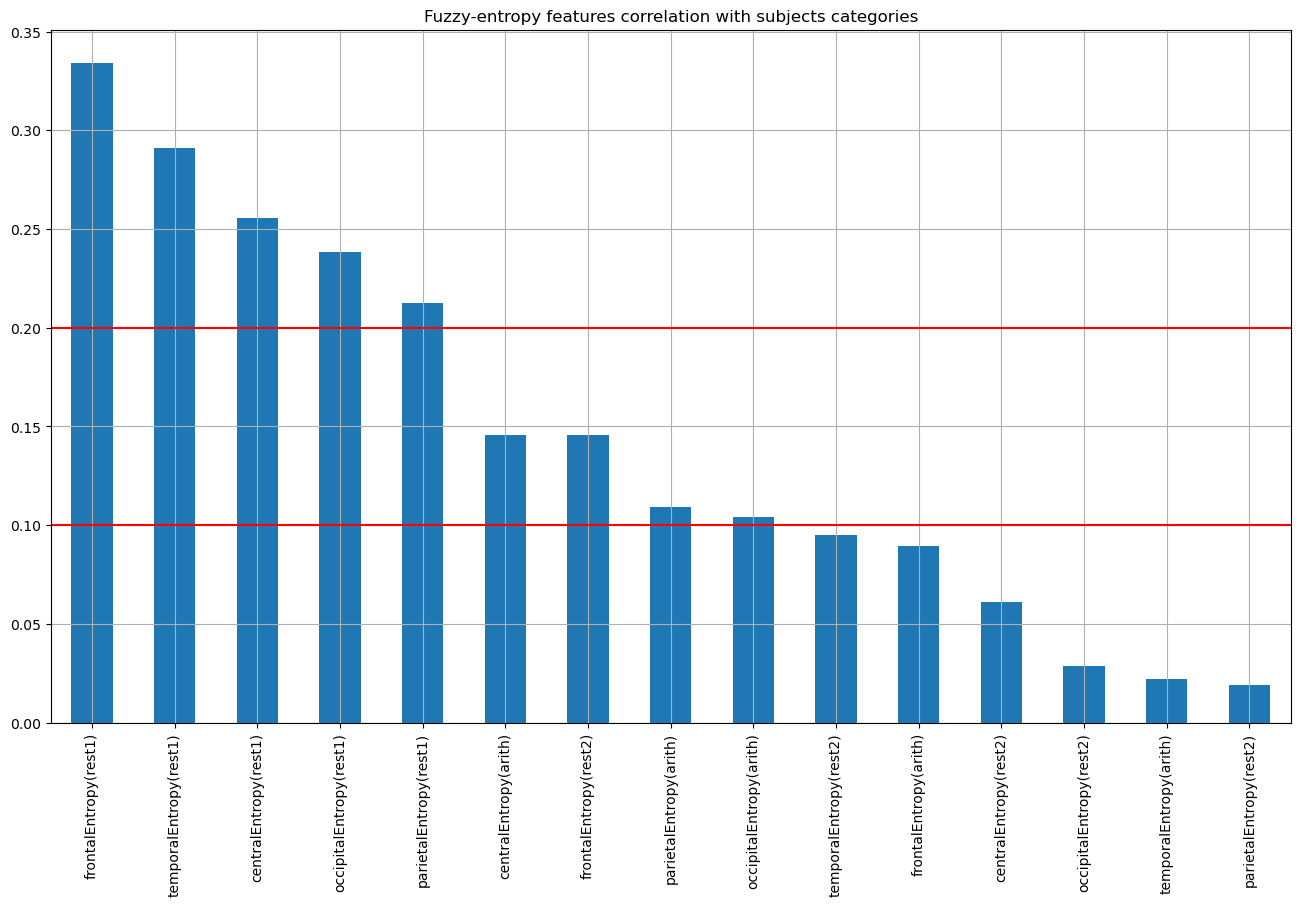

In [12]:
entropy2 = entropy.drop(columns="category", inplace=False)
abs(entropy.corrwith((entropy_features["category"] == "Patient"))).sort_values(
    ascending=False
).plot.bar(
    figsize=(16, 9),
    title="Fuzzy-entropy features correlation with subjects categories",
    grid=True,
)
plt.axhline(y=0.1, color="r", linestyle="-")
plt.axhline(y=0.2, color="r", linestyle="-")
plt.savefig("../data_analysis_results/FuzzEnt/entropies_correlation_tih_categories.png")

/tmp/ipykernel_13566/564808816.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(entropy.corr(),annot=True)


<Axes: >

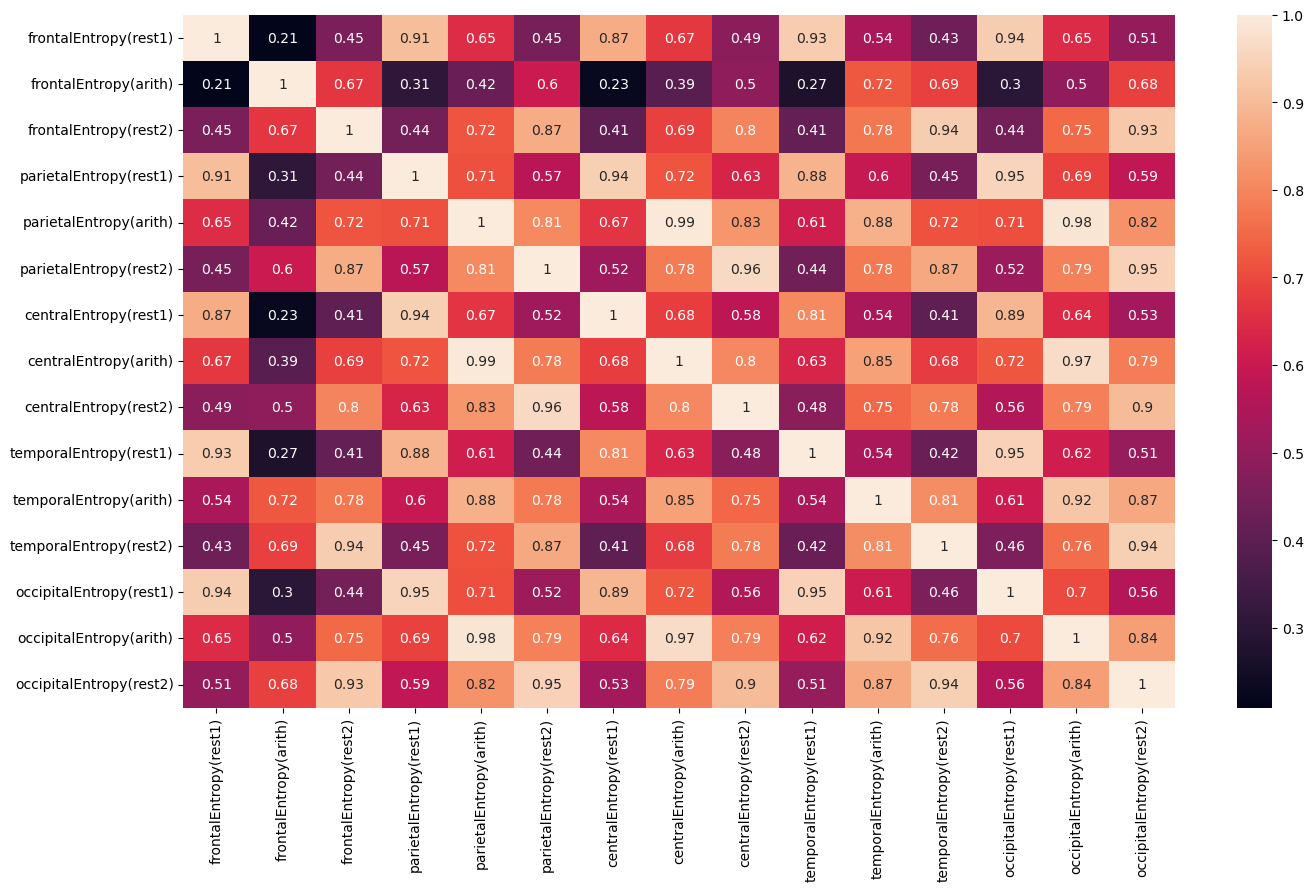

In [10]:
plt.figure(figsize=(16, 9))
sns.heatmap(entropy.corr(), annot=True)

#### t-tests

In [38]:
from scipy import stats

_cols = entropy_features.drop(columns="category").columns.to_list()
entropies_pvalues = pd.DataFrame(index=_cols, columns=_cols)

for row in _cols:
    for col in _cols:
        entropies_pvalues.loc[row, col] = round(
            stats.ttest_ind(patients_entropy[row], controls_entropy[col]).pvalue, 2
        )

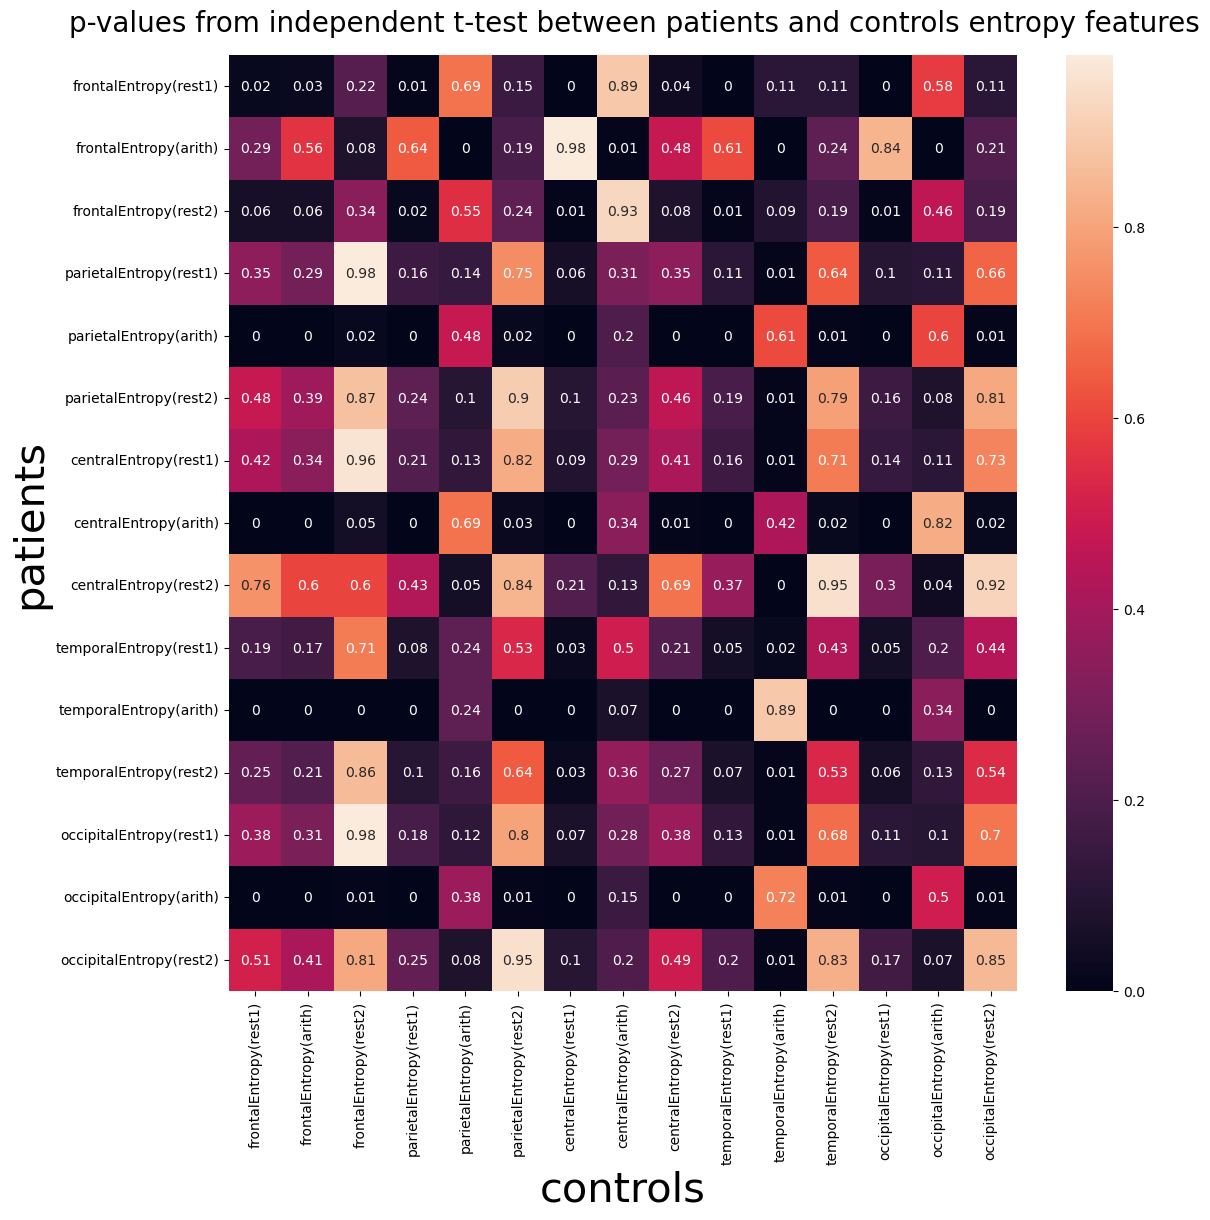

In [52]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(entropies_pvalues.astype(float), annot=True)
fig.suptitle(
    "p-values from independent t-test between patients and controls entropy features",
    fontsize=20,
)
fig.tight_layout(pad=1.5)
plt.xlabel("controls", fontsize=30)
plt.ylabel("patients", fontsize=30)
plt.savefig("../data_analysis_results/FuzzEnt/t-test.png")

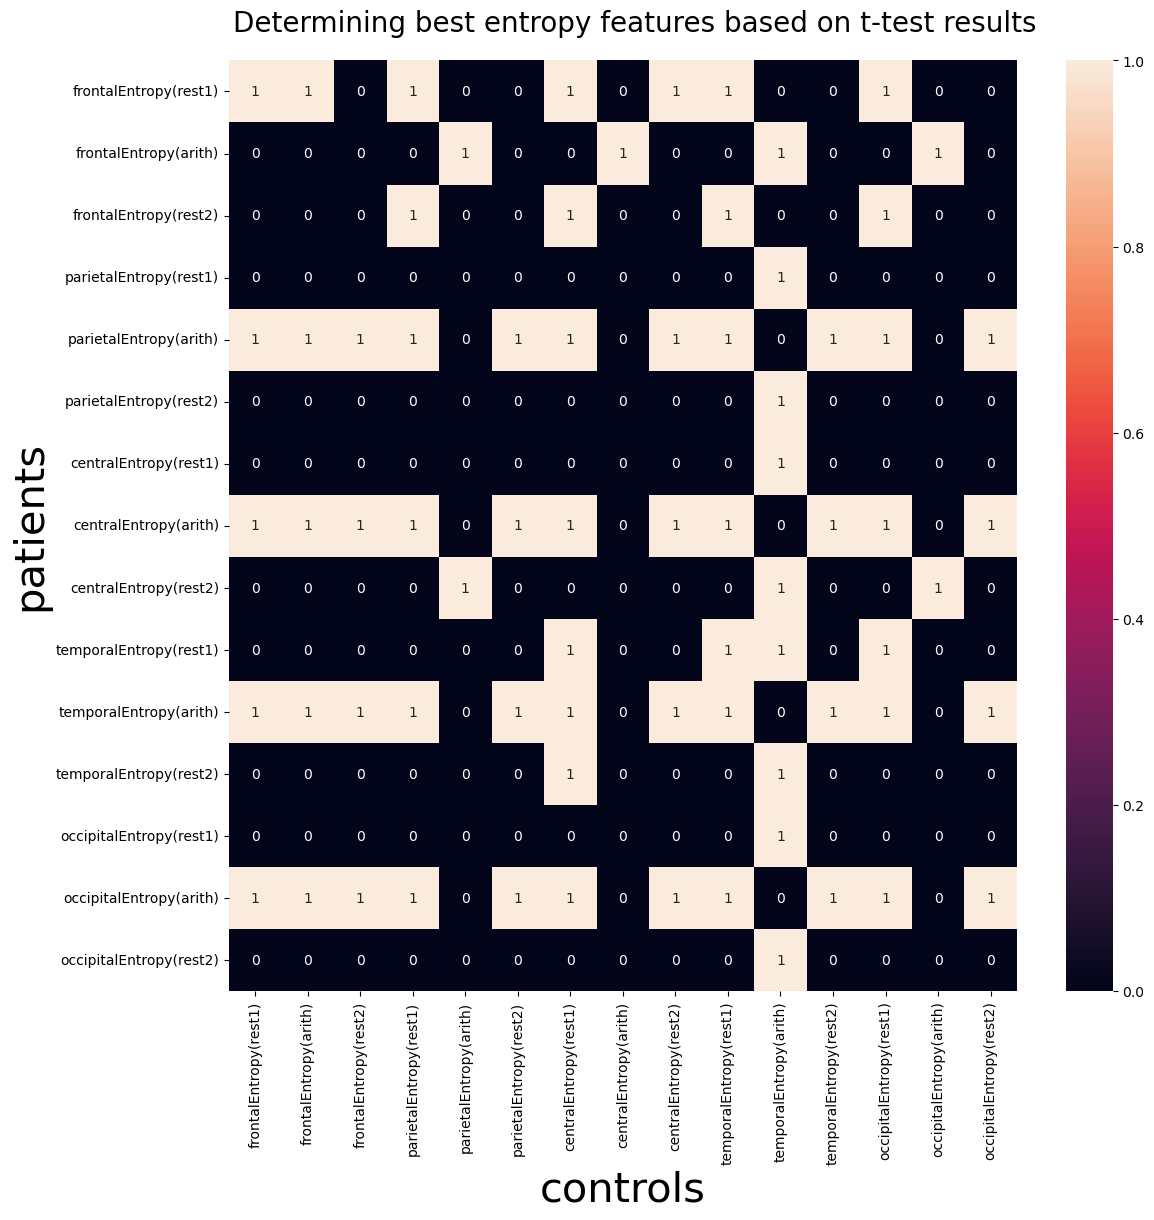

In [55]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(entropies_pvalues.astype(float) <= 0.05, annot=True)
fig.suptitle("Determining best entropy features based on t-test results", fontsize=20)
fig.tight_layout(pad=1.5)
plt.xlabel("controls", fontsize=30)
plt.ylabel("patients", fontsize=30)
plt.savefig("../data_analysis_results/FuzzEnt/qualified_features_4rm_ttest.png")

## features analysis

In [27]:
mmnAnalyser = anls.mmnFeaturesAnalysis(electrodes)
mmnAnalyser.compareMMNdevaintsFrame(
    X_mmn_1k,
    X_mmn_3k,
    features["category"],
    0,
    "Analysing MMN deviant tone MMN value for 0-100ms",
    "../data_analysis_results/MMN/features/deviant_tone_0.png",
)
mmnAnalyser.compareMMNdevaintsFrame(
    X_mmn_1k,
    X_mmn_3k,
    features["category"],
    1,
    "Analysing MMN deviant tone MMN value for 100-200ms",
    "../data_analysis_results/MMN/features/deviant_tone_1.png",
)
mmnAnalyser.compareMMNdevaintsFrame(
    X_mmn_1k,
    X_mmn_3k,
    features["category"],
    2,
    "Analysing MMN deviant tone MMN value for 200-300ms",
    "../data_analysis_results/MMN/features/deviant_tone_2.png",
)
mmnAnalyser.compareMMNdevaintsFrame(
    X_mmn_1k,
    X_mmn_3k,
    features["category"],
    3,
    "Analysing MMN deviant tone MMN value for 300-400ms",
    "../data_analysis_results/MMN/features/deviant_tone_3.png",
)
mmnAnalyser.compareMMNdevaintsFrame(
    X_mmn_1k,
    X_mmn_3k,
    features["category"],
    4,
    "Analysing MMN deviant tone MMN value for 400-450ms",
    "../data_analysis_results/MMN/features/deviant_tone_4.png",
)

In [59]:
entropies_corr = X_entropies.corr()

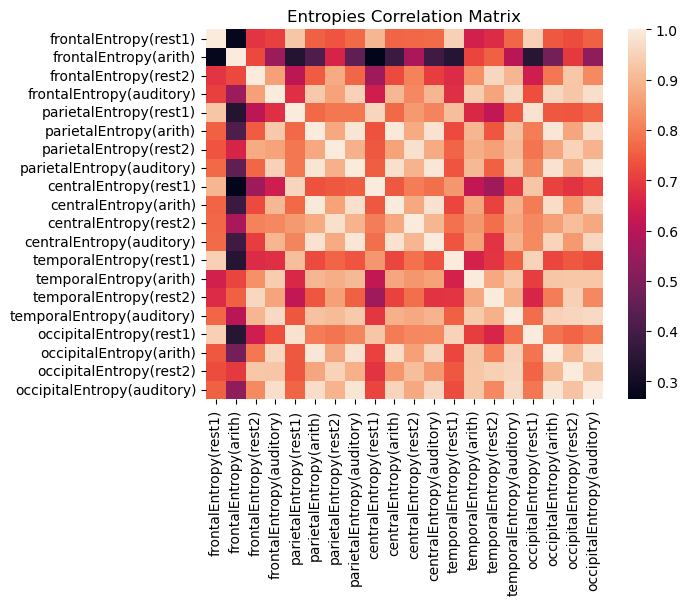

In [60]:
sns.heatmap(data=entropies_corr)
plt.title("Entropies Correlation Matrix")
plt.savefig("../data_analysis_results/FuzzEnt/entropies_corr_mat.png", format="png")

In [48]:
entAnalyser = anls.entropyFeaturesAnalysis()
entAnalyser.compareEntropiesBtwClasses(
    X_entropies.iloc[:, [0, 4, 8, 12, 16, 2, 6, 10, 14, 18]],
    patientsIndex=patientsIndex,
    controlsIndex=controlsIndex,
    title="rest phases fuzzy entropy correlations",
    name="../data_analysis_results/FuzzEnt/rest_phases_corr.png",
)
entAnalyser.compareEntropiesBtwClasses(
    X_entropies.iloc[:, [1, 5, 9, 13, 17]],
    patientsIndex=patientsIndex,
    controlsIndex=controlsIndex,
    title="arithmetic phases fuzzy entropy correlations",
    name="../data_analysis_results/FuzzEnt/arith_phases_corr.png",
    size=(10, 10),
)
entAnalyser.compareEntropiesBtwClasses(
    X_entropies.iloc[:, [3, 7, 11, 15, 19]],
    patientsIndex=patientsIndex,
    controlsIndex=controlsIndex,
    title="auditory phases fuzzy entropy correlations",
    name="../data_analysis_results/FuzzEnt/auditory_phases_corr.png",
    size=(10, 10),
)

In [55]:
entAnalyser.compareEntropiesBtwClasses(
    X_entropies.iloc[:, list(range(0, 4))],
    patientsIndex=patientsIndex,
    controlsIndex=controlsIndex,
    title="frontal region fuzzy entropy correlations",
    name="../data_analysis_results/FuzzEnt/frontal_region_corr.png",
    size=(10, 10),
)
entAnalyser.compareEntropiesBtwClasses(
    X_entropies.iloc[:, list(range(4, 8))],
    patientsIndex=patientsIndex,
    controlsIndex=controlsIndex,
    title="parietal regions fuzzy entropy correlations",
    name="../data_analysis_results/FuzzEnt/parietal_region_corr.png",
    size=(10, 10),
)
entAnalyser.compareEntropiesBtwClasses(
    X_entropies.iloc[:, list(range(8, 12))],
    patientsIndex=patientsIndex,
    controlsIndex=controlsIndex,
    title="central regions fuzzy entropy correlations",
    name="../data_analysis_results/FuzzEnt/central_region_corr.png",
    size=(10, 10),
)
entAnalyser.compareEntropiesBtwClasses(
    X_entropies.iloc[:, list(range(12, 16))],
    patientsIndex=patientsIndex,
    controlsIndex=controlsIndex,
    title="temporal regions fuzzy entropy correlations",
    name="../data_analysis_results/FuzzEnt/temporal_region_corr.png",
    size=(10, 10),
)
entAnalyser.compareEntropiesBtwClasses(
    X_entropies.iloc[:, list(range(16, 20))],
    patientsIndex=patientsIndex,
    controlsIndex=controlsIndex,
    title="occipital regions fuzzy entropy correlations",
    name="../data_analysis_results/FuzzEnt/occipital_region_corr.png",
    size=(10, 10),
)

## Merge features

### all

In [21]:
mmn_values_1k.head()

,Fp1_100ms_1KHz,Fp1_200ms_1KHz,Fp1_300ms_1KHz,Fp1_400ms_1KHz,Fp1_450ms_1KHz,Fp2_100ms_1KHz,Fp2_200ms_1KHz,Fp2_300ms_1KHz,Fp2_400ms_1KHz,Fp2_450ms_1KHz,...,PZ_200ms_1KHz,PZ_300ms_1KHz,PZ_400ms_1KHz,PZ_450ms_1KHz,CZ_100ms_1KHz,CZ_200ms_1KHz,CZ_300ms_1KHz,CZ_400ms_1KHz,CZ_450ms_1KHz,category
0,0.077860,-0.182622,0.279247,0.532200,-0.204365,0.250417,-0.064930,-0.427962,-0.472420,0.012483,...,0.559200,-0.003770,-0.414912,-0.158351,0.077860,-0.182622,0.279247,0.532200,-0.204365,Patient
1,0.771830,0.206960,-0.262004,0.052639,-0.076961,-0.243638,0.362590,0.186396,-0.309906,-0.096431,...,0.067731,-0.257151,-0.415053,0.148657,0.771830,0.206960,-0.262004,0.052639,-0.076961,Patient
2,0.586741,-0.170640,-0.447587,-0.586851,-0.381786,-0.296674,0.182709,0.486881,0.388464,0.047760,...,-0.563643,0.143210,0.215718,0.687152,0.586741,-0.170640,-0.447587,-0.586851,-0.381786,Control
3,0.406416,-0.055197,0.553940,0.478676,-0.329155,0.078385,-0.046267,-0.688571,-0.429975,-0.139107,...,-0.269784,0.389951,0.526786,0.063852,0.406416,-0.055197,0.553940,0.478676,-0.329155,Control
4,-0.716653,0.162533,0.245087,0.260570,0.948333,0.447810,-0.711307,-0.258017,-0.445835,-0.478240,...,-0.472159,0.023695,0.528260,-0.400718,-0.716653,0.162533,0.245087,0.260570,0.948333,Control


In [22]:
mmn_values_3k.head()

,Fp1_100ms_3KHz,Fp1_200ms_3KHz,Fp1_300ms_3KHz,Fp1_400ms_3KHz,Fp1_450ms_3KHz,Fp2_100ms_3KHz,Fp2_200ms_3KHz,Fp2_300ms_3KHz,Fp2_400ms_3KHz,Fp2_450ms_3KHz,...,PZ_200ms_3KHz,PZ_300ms_3KHz,PZ_400ms_3KHz,PZ_450ms_3KHz,CZ_100ms_3KHz,CZ_200ms_3KHz,CZ_300ms_3KHz,CZ_400ms_3KHz,CZ_450ms_3KHz,category
0,0.093326,-0.558467,0.054847,0.210042,-0.229580,0.333641,0.179036,-0.555872,-0.568365,-0.137649,...,0.717427,0.231479,-0.181251,-0.163069,0.093326,-0.558467,0.054847,0.210042,-0.229580,Patient
1,0.729221,0.335054,-0.405998,0.092245,-0.018300,-0.187810,0.155170,0.377523,-0.208573,-0.078908,...,0.287873,-0.138363,-0.665218,0.066725,0.729221,0.335054,-0.405998,0.092245,-0.018300,Patient
2,0.319295,0.289572,-0.188481,-0.328803,-0.641423,-0.568472,0.154382,0.339832,0.357094,0.178545,...,-0.678356,-0.008224,0.047800,0.765628,0.319295,0.289572,-0.188481,-0.328803,-0.641423,Control
3,0.224428,-0.354305,0.357714,0.387876,-0.442867,-0.065394,0.311548,-0.615212,-0.376039,-0.264146,...,-0.322945,0.365996,0.591132,0.108854,0.224428,-0.354305,0.357714,0.387876,-0.442867,Control
4,-0.627777,-0.069188,0.115144,-0.046916,0.649648,0.548180,-0.646261,-0.314960,-0.439212,-0.634127,...,-0.344058,-0.280168,0.525728,-0.087007,-0.627777,-0.069188,0.115144,-0.046916,0.649648,Control


In [24]:
assr_values.head()

,1strest_mag_Fp1,2ndrest_mag_Fp1,aud_mag_Fp1,1strest_mag_Fp2,2ndrest_mag_Fp2,aud_mag_Fp2,1strest_mag_F3,2ndrest_mag_F3,aud_mag_F3,1strest_mag_F4,...,1strest_phase_FZ,2ndrest_phase_FZ,aud_phase_FZ,1strest_phase_PZ,2ndrest_phase_PZ,aud_phase_PZ,1strest_phase_CZ,2ndrest_phase_CZ,aud_phase_CZ,category
0,1.718609e-30,1.796797e-30,2.430580e-29,2.188748e-15,7.698836e-15,2.960174e-15,3.936875e-15,1.453195e-14,5.988868e-15,5.531738e-15,...,-2.561799,0.757103,2.596248,0.636176,-2.356941,-0.541964,0.471613,2.029822,2.397990,Patient
1,6.145584e-30,9.706706e-30,6.077952e-30,4.834967e-15,4.235206e-15,5.280582e-15,8.716825e-15,9.057809e-15,1.156017e-14,1.092718e-14,...,-2.481783,-0.028378,-0.026837,0.639253,3.114420,3.119920,-0.066205,-0.275928,0.912575,Patient
2,2.016393e-30,7.608123e-30,7.008332e-30,8.288267e-15,8.581085e-15,2.246034e-15,1.631625e-14,1.674719e-14,4.329764e-15,2.248127e-14,...,0.057240,2.491298,2.074251,-3.112627,-0.661113,-1.050807,1.869874,2.874248,-2.453191,Control
3,6.569327e-30,2.983832e-30,7.666937e-30,1.002970e-14,3.445079e-15,4.979713e-15,1.979552e-14,6.804030e-15,9.598513e-15,2.774534e-14,...,2.530001,-0.081006,-1.304518,-0.615937,3.073146,1.822343,2.433461,2.955727,-0.115264,Control
4,9.275827e-31,2.610361e-30,2.808968e-30,1.941656e-15,8.177057e-16,2.663667e-15,3.615347e-15,1.634868e-15,4.633769e-15,4.873429e-15,...,-0.882816,1.891507,-1.083666,2.171547,-1.224357,2.037564,-1.161887,2.766240,-2.645517,Control


In [25]:
entropy_features.head()

,frontalEntropy(rest1),frontalEntropy(arith),frontalEntropy(rest2),parietalEntropy(rest1),parietalEntropy(arith),parietalEntropy(rest2),centralEntropy(rest1),centralEntropy(arith),centralEntropy(rest2),temporalEntropy(rest1),temporalEntropy(arith),temporalEntropy(rest2),occipitalEntropy(rest1),occipitalEntropy(arith),occipitalEntropy(rest2),category
10_0,5.285506,5.516579,6.843723,3.983493,6.032148,4.170336,4.809451,5.332050,4.091032,3.945999,7.283139,6.148835,3.456758,6.826992,5.377234,Patient
10_1,5.871802,5.243701,7.772336,4.064578,5.734826,4.981421,3.839269,5.369243,4.069415,4.937621,6.763848,6.930828,4.794076,6.667069,5.826653,Patient
11_0,5.082414,4.097428,4.041579,4.962581,5.424828,5.009800,4.763656,5.216139,4.599104,5.372436,5.346930,4.132445,4.890854,5.269775,4.451813,Control
11_1,4.739910,3.205360,4.534301,4.138735,5.143887,4.314634,4.242247,4.865794,4.172947,4.146636,5.137967,4.114244,3.833269,5.130625,4.248905,Control
12_0,3.481349,2.004735,2.285997,3.032094,3.527547,2.425353,2.855066,3.324150,2.402615,3.409738,3.626762,1.482925,2.891582,3.512754,2.293883,Control


In [38]:
mmn_values_1k.category.values.all() == mmn_values_3k.category.values.all() == assr_values.category.values.all() == entropy_features.category.values.all()

True

In [47]:
mmn_values_1k.category.index.all() == mmn_values_3k.category.index.all() == assr_values.category.index.all() == entropy_features.index.values.all()

False

In [48]:
mmn_values_1k.category.index.all() == mmn_values_3k.category.index.all() == assr_values.category.index.all()

True

In [49]:
print(entropy_features.index.values)
print(mmn_values_1k.index.values)

['10_0' '10_1' '11_0' '11_1' '12_0' '12_1' '13_0' '13_1' '14_0' '14_1'
 '15_0' '15_1' '17_0' '17_1' '18_0' '18_1' '19_0' '19_1' '21_0' '21_1'
 '22_0' '22_1' '22_2' '24_0' '24_1' '25_0' '25_1' '26_0' '26_1' '27_0'
 '27_1' '28_0' '28_1' '28_2' '29_0' '29_1' '3_0' '3_1' '30_0' '30_1'
 '31_0' '31_1' '31_2' '7_0' '7_1']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


In [97]:
entropy_features = entropy_features.reset_index()

In [98]:
mmn_values_1k.category.index.all() == mmn_values_3k.category.index.all() == assr_values.category.index.all() == entropy_features.index.values.all()

True

In [116]:
category = mmn_values_1k.category
df = pd.concat([mmn_values_1k, mmn_values_3k], axis=1)
df = pd.concat([df, assr_values], axis=1)
df = pd.concat([df, entropy_features], axis=1)

df = df.drop(columns="category")

df["category"] = category

/tmp/ipykernel_6043/1400295787.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['category'] = category


In [117]:
df.shape

(45, 321)

In [119]:
(
    mmn_values_1k.shape[1]
    + mmn_values_3k.shape[1]
    + assr_values.shape[1]
    + entropy_features.shape[1]
)

324

In [120]:
df.head()

,Fp1_100ms_1KHz,Fp1_200ms_1KHz,Fp1_300ms_1KHz,Fp1_400ms_1KHz,Fp1_450ms_1KHz,Fp2_100ms_1KHz,Fp2_200ms_1KHz,Fp2_300ms_1KHz,Fp2_400ms_1KHz,Fp2_450ms_1KHz,...,centralEntropy(rest1),centralEntropy(arith),centralEntropy(rest2),temporalEntropy(rest1),temporalEntropy(arith),temporalEntropy(rest2),occipitalEntropy(rest1),occipitalEntropy(arith),occipitalEntropy(rest2),category
0,0.077860,-0.182622,0.279247,0.532200,-0.204365,0.250417,-0.064930,-0.427962,-0.472420,0.012483,...,4.809451,5.332050,4.091032,3.945999,7.283139,6.148835,3.456758,6.826992,5.377234,Patient
1,0.771830,0.206960,-0.262004,0.052639,-0.076961,-0.243638,0.362590,0.186396,-0.309906,-0.096431,...,3.839269,5.369243,4.069415,4.937621,6.763848,6.930828,4.794076,6.667069,5.826653,Patient
2,0.586741,-0.170640,-0.447587,-0.586851,-0.381786,-0.296674,0.182709,0.486881,0.388464,0.047760,...,4.763656,5.216139,4.599104,5.372436,5.346930,4.132445,4.890854,5.269775,4.451813,Control
3,0.406416,-0.055197,0.553940,0.478676,-0.329155,0.078385,-0.046267,-0.688571,-0.429975,-0.139107,...,4.242247,4.865794,4.172947,4.146636,5.137967,4.114244,3.833269,5.130625,4.248905,Control
4,-0.716653,0.162533,0.245087,0.260570,0.948333,0.447810,-0.711307,-0.258017,-0.445835,-0.478240,...,2.855066,3.324150,2.402615,3.409738,3.626762,1.482925,2.891582,3.512754,2.293883,Control


In [121]:
df.describe()

,Fp1_100ms_1KHz,Fp1_200ms_1KHz,Fp1_300ms_1KHz,Fp1_400ms_1KHz,Fp1_450ms_1KHz,Fp2_100ms_1KHz,Fp2_200ms_1KHz,Fp2_300ms_1KHz,Fp2_400ms_1KHz,Fp2_450ms_1KHz,...,parietalEntropy(rest2),centralEntropy(rest1),centralEntropy(arith),centralEntropy(rest2),temporalEntropy(rest1),temporalEntropy(arith),temporalEntropy(rest2),occipitalEntropy(rest1),occipitalEntropy(arith),occipitalEntropy(rest2)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.115363,-0.051501,0.076797,0.058663,-0.103720,0.001778,-0.001258,-0.042371,-0.051057,-0.013854,...,4.851188,4.481702,5.774285,4.587774,4.689325,6.580613,4.880317,4.540303,6.134899,4.801926
std,0.503851,0.344380,0.334743,0.432359,0.464893,0.441086,0.347603,0.416247,0.465245,0.490661,...,1.785314,1.587790,1.889525,1.715760,1.433597,2.037625,1.696056,1.529989,2.073115,1.661780
min,-0.815991,-0.671149,-0.685429,-0.885361,-0.812857,-0.803061,-0.773213,-0.714578,-0.845384,-0.860885,...,2.128722,1.975982,2.129566,1.621041,1.374844,2.904443,1.482925,1.997057,1.996069,1.937450
25%,-0.317453,-0.280111,-0.163746,-0.216385,-0.447365,-0.340735,-0.168995,-0.358391,-0.433019,-0.390993,...,3.137426,3.286599,3.852164,3.063503,3.898383,4.990185,3.701527,3.380543,4.054229,3.424172
50%,0.240041,-0.062094,0.151691,0.052639,-0.112249,-0.027864,0.025479,-0.070448,-0.127707,-0.096431,...,5.009800,4.251184,5.991856,4.599104,4.737698,7.003274,5.023968,4.555083,6.500328,5.011879
75%,0.577841,0.213785,0.290899,0.349477,0.101267,0.311511,0.220466,0.324228,0.387438,0.507937,...,5.650391,5.464230,7.407162,5.371057,5.953930,8.049676,6.076505,5.641581,8.160295,5.826653
max,0.771830,0.681047,0.709743,0.817380,0.948333,0.831922,0.724213,0.773255,0.750365,0.822368,...,9.572494,9.141592,8.847224,8.996514,7.846541,10.523407,8.577266,7.895410,9.202006,7.841864


In [130]:
joblib.dump(df, "../features/all_features.sav")

['../features/all_features.sav']